Link: https://www.kaggle.com/c/fuga-de-clientes

Link Ensemble: https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

https://www.kaggle.com/yekenot/simple-stacker-lb-0-284/code

http://lightgbm.readthedocs.io/en/latest/Quick-Start.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import mode, gmean, hmean

import warnings
warnings.filterwarnings("ignore")

In [2]:
def describe_data(data):
    print("----------------------------------------------------------------")
    print("----- DATA REVIEW:")
    print("Length: {} rows, {} columns".format(len(data), len(data.columns)))
    print("\n----- DATA INFO:")
    print(data.info())
    print("\n----- MEMORY:")
    memory = data.memory_usage(index=True).sum()
    print("Memory consumed by training set : {} MB - {} KB" .format(memory/1024**2, memory/1024))
    print("\n----- VARIABLES:")
    for var in data.columns:
        print("--- VAR '{}':".format(var))
        number_values = len(data[var].unique())
        print("# Unique: {}".format(number_values))
        if(number_values < 20):
            print(data[var].unique())
        print("")

# 1. LOAD DATA

In [3]:
train_clientes_ori = pd.read_excel("data/train_clientes.xlsx")
train_clientes_ori.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,...,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,...,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,...,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,...,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#describe_data(train_clientes_ori)

In [5]:
test_clientes_ori = pd.read_excel("data/test_clientes.xlsx")
test_clientes_ori.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,47411,201208,0,Rang_ingreso_03,NaN,NaN,0.0,Rango_SDO_01,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39861,201208,1,Rang_ingreso_03,Provincia,37.0,0.0,Rango_SDO_01,0,0,...,2,2,2,2,0,0,0,0,0,1
2,38898,201208,1,Rang_ingreso_04,Lima,26.0,4.0,Rango_SDO_04,0,0,...,3,3,3,3,1,1,1,1,1,1
3,50927,201208,1,Rang_ingreso_02,Lima,34.0,4.0,Rango_SDO_07,0,0,...,1,1,0,0,0,0,0,0,0,0
4,32969,201208,1,Rang_ingreso_03,Lima,22.0,2.0,Rango_SDO_01,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#describe_data(test_clientes_ori)

In [7]:
train_requerimientos_ori = pd.read_excel("data/train_requerimientos.xlsx")
train_requerimientos_ori["FLAG"] = 1
train_requerimientos_ori["train_test"] = 'train'
train_requerimientos_ori.DICTAMEN.fillna('PROCEDE TOTAL',inplace = True)
train_requerimientos_ori.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,FLAG,train_test
0,64216,Reclamo,NO PROCEDE,201206,Producto 20,Submotivo 43,1,train
1,64216,Solicitud,NO PROCEDE,201205,Producto 20,Submotivo 157,1,train
2,35660,Reclamo,PROCEDE TOTAL,201208,Producto 17,Submotivo 89,1,train
3,22480,Reclamo,PROCEDE TOTAL,201208,Producto 07,Submotivo 27,1,train
4,24691,Solicitud,PROCEDE TOTAL,201208,Producto 20,Submotivo 132,1,train


In [8]:
#describe_data(train_requerimientos_ori)

In [9]:
test_requerimientos_ori = pd.read_excel("data/test_requerimientos.xlsx")
test_requerimientos_ori["FLAG"] = 1
test_requerimientos_ori["train_test"] = 'test'
test_requerimientos_ori.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,FLAG,train_test
0,39048,Reclamo,PROCEDE TOTAL,201206,Producto 18,Submotivo 125,1,test
1,39048,Reclamo,NO PROCEDE,201205,Producto 18,Submotivo 125,1,test
2,98389,Solicitud,PROCEDE TOTAL,201208,Producto 07,Submotivo 160,1,test
3,96233,Solicitud,PROCEDE TOTAL,201207,Producto 07,Submotivo 144,1,test
4,96233,Reclamo,NO PROCEDE,201207,Producto 18,Submotivo 65,1,test


In [10]:
#describe_data(test_requerimientos_ori)

In [11]:
print("Listo")

Listo


### Transformación de Variables:

In [42]:
train = train_clientes_ori.copy()
del train['CODMES']

test = test_clientes_ori.copy()
del test['CODMES']

In [43]:
train['NAN_COUNTS'] = train.isnull().sum(axis=1)
test['NAN_COUNTS'] = test.isnull().sum(axis=1)

In [44]:
train.describe()

,ID_CORRELATIVO,FLG_BANCARIZADO,EDAD,ANTIGUEDAD,ATTRITION,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,...,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,NAN_COUNTS
count,70000.000000,70000.000000,64674.000000,68238.000000,70000.000000,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49922.740729,0.839043,35.232474,2.549283,0.154600,9.650613e+03,9.389334e+03,9.017541e+03,8.678497e+03,8.477068e+03,...,1.928971,1.873600,1.854386,0.538400,0.536557,0.537843,0.535414,0.530657,0.527686,0.284157
std,28896.279736,0.367494,11.536038,3.205424,0.361526,9.971066e+04,9.893696e+04,9.653027e+04,9.415682e+04,8.755091e+04,...,1.889000,1.869672,1.853515,0.498527,0.498665,0.498569,0.498748,0.499063,0.499236,0.660122
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24958.750000,1.000000,27.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49972.500000,1.000000,32.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,74948.750000,1.000000,41.000000,5.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,100000.000000,1.000000,98.000000,23.000000,1.000000,1.134850e+07,1.128956e+07,1.130299e+07,1.070629e+07,1.062028e+07,...,11.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [45]:
y = 'NAN_COUNTS'
pd.DataFrame(train[:][y].value_counts().values, columns = ['Cantidad'])

,Cantidad
0,56262
1,9478
2,2453
3,1721
4,86


In [46]:
y = 'NAN_COUNTS'
pd.DataFrame(test[:][y].value_counts().values, columns = ['Cantidad'])

,Cantidad
0,23997
1,4122
2,1058
3,782
4,41


In [47]:
pd.DataFrame(np.array(train.groupby(y, as_index = False, axis = 0)["ATTRITION"].mean()), 
                         columns = [y,"% ratio_conv"])

,NAN_COUNTS,% ratio_conv
0,0.0,0.121147
1,1.0,0.293627
2,2.0,0.299633
3,3.0,0.248693
4,4.0,0.697674


In [48]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,...,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,NAN_COUNTS
0,35653,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,...,1,1,1,1,0,0,0,0,0,0
1,66575,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,...,1,1,1,0,0,0,0,0,0,0
2,56800,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8410,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,...,3,3,3,1,1,1,1,1,1,0
4,6853,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
list(train.columns)

['ID_CORRELATIVO',
 'FLG_BANCARIZADO',
 'RANG_INGRESO',
 'FLAG_LIMA_PROVINCIA',
 'EDAD',
 'ANTIGUEDAD',
 'ATTRITION',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'SDO_ACTIVO_MENOS2',
 'SDO_ACTIVO_MENOS3',
 'SDO_ACTIVO_MENOS4',
 'SDO_ACTIVO_MENOS5',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'FLG_SEGURO_MENOS3',
 'FLG_SEGURO_MENOS4',
 'FLG_SEGURO_MENOS5',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'FLG_NOMINA',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL1_MENOS3',
 'NRO_ACCES_CANAL1_MENOS4',
 'NRO_ACCES_CANAL1_MENOS5',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL2_MENOS2',
 'NRO_ACCES_CANAL2_MENOS3',
 'NRO_ACCES_CANAL2_MENOS4',
 'NRO_ACCES_CANAL2_MENOS5',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF

In [50]:
# RANG_INGRESO
train.RANG_INGRESO.fillna('Rang_ingreso_00',inplace = True)
test.RANG_INGRESO.fillna('Rang_ingreso_00',inplace = True)

In [51]:
# FLAG_LIMA_PROVINCIA
train.FLAG_LIMA_PROVINCIA.fillna('Nulo',inplace = True)
test.FLAG_LIMA_PROVINCIA.fillna('Nulo',inplace = True)

In [52]:
# EDAD
train.EDAD.fillna(-99,inplace = True)
test.EDAD.fillna(-99,inplace = True)

In [53]:
# ANTIGUEDAD
train.ANTIGUEDAD.fillna(-99,inplace = True)
test.ANTIGUEDAD.fillna(-99,inplace = True)

train.ANTIGUEDAD[train.ANTIGUEDAD > 10] = 99
test.ANTIGUEDAD[test.ANTIGUEDAD > 10] = 99

### Encoding Vars

In [54]:
# To convert categorical features to dummys
categorical_features = [ 'FLAG_LIMA_PROVINCIA']

In [55]:
for var in categorical_features:
    temp_dummies = pd.get_dummies(train[:][var], prefix = var, prefix_sep = '_')
    train = pd.concat([train, temp_dummies], axis = 1)
    del train[var]
    
    temp_dummies = pd.get_dummies(test[:][var], prefix = var, prefix_sep = '_')
    test = pd.concat([test, temp_dummies], axis = 1)
    del test[var]

In [56]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,NAN_COUNTS,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia
0,35653,1,Rang_ingreso_06,25.0,6.0,0,Rango_SDO_09,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,66575,1,Rang_ingreso_03,27.0,0.0,0,Rango_SDO_01,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,56800,1,Rang_ingreso_01,34.0,4.0,0,Rango_SDO_02,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8410,1,Rang_ingreso_04,63.0,5.0,0,Rango_SDO_03,0,0,0,...,1,1,1,1,1,1,0,0,0,1
4,6853,1,Rang_ingreso_00,25.0,0.0,0,Rango_SDO_01,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [57]:
columns_le = [ 'RANG_INGRESO',
 'RANG_SDO_PASIVO_MENOS0',
 'RANG_NRO_PRODUCTOS_MENOS0']

In [58]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for var in columns_le:
    lbl = lbl.fit(train[var])
    # Apply LabelEncoder
    train[var] = lbl.transform(train[var])
    test[var] = lbl.transform(test[var])

In [59]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,...,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,NAN_COUNTS,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia
0,35653,1,6,25.0,6.0,0,9,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,66575,1,3,27.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,56800,1,1,34.0,4.0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8410,1,4,63.0,5.0,0,3,0,0,0,...,1,1,1,1,1,1,0,0,0,1
4,6853,1,0,25.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Feature Engineering

In [60]:
train['train_test'] = 'train'
test['train_test'] = 'test'
dataset = pd.concat([train, test], axis = 0).reset_index(drop = True)

In [61]:
list(train.columns)

['ID_CORRELATIVO',
 'FLG_BANCARIZADO',
 'RANG_INGRESO',
 'EDAD',
 'ANTIGUEDAD',
 'ATTRITION',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'SDO_ACTIVO_MENOS2',
 'SDO_ACTIVO_MENOS3',
 'SDO_ACTIVO_MENOS4',
 'SDO_ACTIVO_MENOS5',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'FLG_SEGURO_MENOS3',
 'FLG_SEGURO_MENOS4',
 'FLG_SEGURO_MENOS5',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'FLG_NOMINA',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL1_MENOS3',
 'NRO_ACCES_CANAL1_MENOS4',
 'NRO_ACCES_CANAL1_MENOS5',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL2_MENOS2',
 'NRO_ACCES_CANAL2_MENOS3',
 'NRO_ACCES_CANAL2_MENOS4',
 'NRO_ACCES_CANAL2_MENOS5',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'NRO_ENTID_SS

In [62]:
dataset.shape

(100000, 56)

In [63]:
def f_cont_ajustado(lista):
    cont = 0
    for num in lista:
        if(num > 0):
            cont+=1
    return(cont)

def f_prom_ajustado(lista):
    suma = 0
    cont = 0
    for num in lista:
        if(num != 0):
            cont+=1
            suma+=num
    if(suma==0):
        return(0)
    else:
        return(suma/cont)
    
def f_flag_increm(lista):
    if (lista[0] > lista [1]):
        return(1)
    elif (lista[0] == lista [1]):
        return(0)
    else:
        return(-1)
    
def f_nro_vars(lista):
    cont = 0
    for num in lista:
        if(num != 0):
            cont+=1
    return(cont)

In [64]:
# SDO_ACTIVO
dataset['SDO_ACTIVO_ULT3M'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2']].apply(np.mean, axis = 1)

dataset['SDO_ACTIVO_ULT3M_ajus'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2']].apply(f_prom_ajustado, axis = 1)

dataset['SDO_ACTIVO_ULT3M_cont'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2']].apply(f_cont_ajustado, axis = 1)


dataset['SDO_ACTIVO_ULT6M'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2'
      ,'SDO_ACTIVO_MENOS3','SDO_ACTIVO_MENOS4','SDO_ACTIVO_MENOS5']].apply(np.mean, axis = 1)

dataset['SDO_ACTIVO_ULT6M_ajus'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2'
      ,'SDO_ACTIVO_MENOS3','SDO_ACTIVO_MENOS4','SDO_ACTIVO_MENOS5']].apply(f_prom_ajustado, axis = 1)

dataset['SDO_ACTIVO_ULT6M_cont'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2'
      ,'SDO_ACTIVO_MENOS3','SDO_ACTIVO_MENOS4','SDO_ACTIVO_MENOS5']].apply(f_cont_ajustado, axis = 1)


dataset['SDO_ACTIVO_DIFF0'] = dataset[['SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1']].apply(f_flag_increm, axis = 1)
dataset['SDO_ACTIVO_DIFF1'] = dataset[['SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2']].apply(f_flag_increm, axis = 1)
dataset['SDO_ACTIVO_DIFF2'] = dataset[['SDO_ACTIVO_MENOS2','SDO_ACTIVO_MENOS3']].apply(f_flag_increm, axis = 1)
dataset['SDO_ACTIVO_DIFF3'] = dataset[['SDO_ACTIVO_MENOS3','SDO_ACTIVO_MENOS4']].apply(f_flag_increm, axis = 1)
dataset['SDO_ACTIVO_DIFF4'] = dataset[['SDO_ACTIVO_MENOS4','SDO_ACTIVO_MENOS5']].apply(f_flag_increm, axis = 1)

dataset['SDO_ACTIVO_VARS_ULT3M'] = dataset[['SDO_ACTIVO_DIFF0','SDO_ACTIVO_DIFF1']].apply(f_nro_vars, axis = 1)
dataset['SDO_ACTIVO_VARS_ULT6M'] = dataset[['SDO_ACTIVO_DIFF0','SDO_ACTIVO_DIFF1','SDO_ACTIVO_DIFF2',
                                            'SDO_ACTIVO_DIFF3','SDO_ACTIVO_DIFF4']].apply(f_nro_vars, axis = 1)

dataset[dataset['train_test'] == 'train'].groupby(['FLG_BANCARIZADO',"SDO_ACTIVO_DIFF0"], as_index = False, axis = 0)["ATTRITION"].count()

In [65]:
# FLG_SEGURO
dataset['FLG_SEGURO_ULT3M'] = dataset[['FLG_SEGURO_MENOS0','FLG_SEGURO_MENOS1','FLG_SEGURO_MENOS2']].apply(np.sum, axis = 1)

dataset['FLG_SEGURO_ULT6M'] = dataset[['FLG_SEGURO_MENOS0','FLG_SEGURO_MENOS1','FLG_SEGURO_MENOS2'
      ,'FLG_SEGURO_MENOS3','FLG_SEGURO_MENOS4','FLG_SEGURO_MENOS5']].apply(np.sum, axis = 1)

dataset['FLG_SEGURO_DIFF0'] = dataset[['FLG_SEGURO_MENOS0','FLG_SEGURO_MENOS1']].apply(f_flag_increm, axis = 1)
dataset['FLG_SEGURO_DIFF1'] = dataset[['FLG_SEGURO_MENOS1','FLG_SEGURO_MENOS2']].apply(f_flag_increm, axis = 1)
dataset['FLG_SEGURO_DIFF2'] = dataset[['FLG_SEGURO_MENOS2','FLG_SEGURO_MENOS3']].apply(f_flag_increm, axis = 1)
dataset['FLG_SEGURO_DIFF3'] = dataset[['FLG_SEGURO_MENOS3','FLG_SEGURO_MENOS4']].apply(f_flag_increm, axis = 1)
dataset['FLG_SEGURO_DIFF4'] = dataset[['FLG_SEGURO_MENOS4','FLG_SEGURO_MENOS5']].apply(f_flag_increm, axis = 1)

dataset['FLG_SEGURO_VARS_ULT3M'] = dataset[['FLG_SEGURO_DIFF0','FLG_SEGURO_DIFF1']].apply(f_cont_ajustado, axis = 1)
dataset['FLG_SEGURO_VARS_ULT6M'] = dataset[['FLG_SEGURO_DIFF0','FLG_SEGURO_DIFF1','FLG_SEGURO_DIFF2',
                                            'FLG_SEGURO_DIFF3','FLG_SEGURO_DIFF4']].apply(f_nro_vars, axis = 1)

In [66]:
# NRO_ACCES_CANAL1 total
dataset['NRO_ACCES_CANALES_MENOS0'] = dataset[['NRO_ACCES_CANAL1_MENOS0','NRO_ACCES_CANAL2_MENOS0','NRO_ACCES_CANAL3_MENOS0']].apply(np.sum, axis = 1)
dataset['NRO_ACCES_CANALES_MENOS1'] = dataset[['NRO_ACCES_CANAL1_MENOS1','NRO_ACCES_CANAL2_MENOS1','NRO_ACCES_CANAL3_MENOS1']].apply(np.sum, axis = 1)
dataset['NRO_ACCES_CANALES_MENOS2'] = dataset[['NRO_ACCES_CANAL1_MENOS2','NRO_ACCES_CANAL2_MENOS2','NRO_ACCES_CANAL3_MENOS2']].apply(np.sum, axis = 1)
dataset['NRO_ACCES_CANALES_MENOS3'] = dataset[['NRO_ACCES_CANAL1_MENOS3','NRO_ACCES_CANAL2_MENOS3','NRO_ACCES_CANAL3_MENOS3']].apply(np.sum, axis = 1)
dataset['NRO_ACCES_CANALES_MENOS4'] = dataset[['NRO_ACCES_CANAL1_MENOS4','NRO_ACCES_CANAL2_MENOS4','NRO_ACCES_CANAL3_MENOS4']].apply(np.sum, axis = 1)
dataset['NRO_ACCES_CANALES_MENOS5'] = dataset[['NRO_ACCES_CANAL1_MENOS5','NRO_ACCES_CANAL2_MENOS5','NRO_ACCES_CANAL3_MENOS5']].apply(np.sum, axis = 1)

In [67]:
# NRO_ACCES_CANALES
lista_variables_canal = ['NRO_ACCES_CANAL1', 'NRO_ACCES_CANAL2', 'NRO_ACCES_CANAL3', 'NRO_ACCES_CANALES']

for var in lista_variables_canal:
    dataset[var+'_ULT3M'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2']].apply(np.mean, axis = 1)

    dataset[var+'_ULT3M_ajus'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2']].apply(f_prom_ajustado, axis = 1)

    dataset[var+'_ULT3M_cont'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2']].apply(f_cont_ajustado, axis = 1)


    dataset[var+'_ULT6M'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2'
          ,var+'_MENOS3',var+'_MENOS4',var+'_MENOS5']].apply(np.mean, axis = 1)

    dataset[var+'_ULT6M_ajus'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2'
          ,var+'_MENOS3',var+'_MENOS4',var+'_MENOS5']].apply(f_prom_ajustado, axis = 1)

    dataset[var+'_ULT6M_cont'] = dataset[[var+'_MENOS0',var+'_MENOS1',var+'_MENOS2'
          ,var+'_MENOS3',var+'_MENOS4',var+'_MENOS5']].apply(f_cont_ajustado, axis = 1)


    dataset[var+'_DIFF0'] = dataset[[var+'_MENOS0',var+'_MENOS1']].apply(f_flag_increm, axis = 1)
    dataset[var+'_DIFF1'] = dataset[[var+'_MENOS1',var+'_MENOS2']].apply(f_flag_increm, axis = 1)
    dataset[var+'_DIFF2'] = dataset[[var+'_MENOS2',var+'_MENOS3']].apply(f_flag_increm, axis = 1)
    dataset[var+'_DIFF3'] = dataset[[var+'_MENOS3',var+'_MENOS4']].apply(f_flag_increm, axis = 1)
    dataset[var+'_DIFF4'] = dataset[[var+'_MENOS4',var+'_MENOS5']].apply(f_flag_increm, axis = 1)

    dataset[var+'_VARS_ULT3M'] = dataset[[var+'_DIFF0',var+'_DIFF1']].apply(f_nro_vars, axis = 1)
    dataset[var+'_VARS_ULT6M'] = dataset[[var+'_DIFF0',var+'_DIFF1',var+'_DIFF2',
                                                var+'_DIFF3',var+'_DIFF4']].apply(f_nro_vars, axis = 1)
    print(var+" Listo!")

NRO_ACCES_CANAL1 Listo!
NRO_ACCES_CANAL2 Listo!
NRO_ACCES_CANAL3 Listo!
NRO_ACCES_CANALES Listo!


In [68]:
# NRO_ENTID_SSFF
dataset['NRO_ENTID_SSFF_ULT3M'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2']].apply(np.mean, axis = 1)

dataset['NRO_ENTID_SSFF_ULT3M_ajus'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2']].apply(f_prom_ajustado, axis = 1)

dataset['NRO_ENTID_SSFF_ULT3M_cont'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2']].apply(f_cont_ajustado, axis = 1)


dataset['NRO_ENTID_SSFF_ULT6M'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2'
      ,'NRO_ENTID_SSFF_MENOS3','NRO_ENTID_SSFF_MENOS4','NRO_ENTID_SSFF_MENOS5']].apply(np.mean, axis = 1)

dataset['NRO_ENTID_SSFF_ULT6M_ajus'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2'
      ,'NRO_ENTID_SSFF_MENOS3','NRO_ENTID_SSFF_MENOS4','NRO_ENTID_SSFF_MENOS5']].apply(f_prom_ajustado, axis = 1)

dataset['NRO_ENTID_SSFF_ULT6M_cont'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2'
      ,'NRO_ENTID_SSFF_MENOS3','NRO_ENTID_SSFF_MENOS4','NRO_ENTID_SSFF_MENOS5']].apply(f_cont_ajustado, axis = 1)


dataset['NRO_ENTID_SSFF_DIFF0'] = dataset[['NRO_ENTID_SSFF_MENOS0','NRO_ENTID_SSFF_MENOS1']].apply(f_flag_increm, axis = 1)
dataset['NRO_ENTID_SSFF_DIFF1'] = dataset[['NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2']].apply(f_flag_increm, axis = 1)
dataset['NRO_ENTID_SSFF_DIFF2'] = dataset[['NRO_ENTID_SSFF_MENOS2','NRO_ENTID_SSFF_MENOS3']].apply(f_flag_increm, axis = 1)
dataset['NRO_ENTID_SSFF_DIFF3'] = dataset[['NRO_ENTID_SSFF_MENOS3','NRO_ENTID_SSFF_MENOS4']].apply(f_flag_increm, axis = 1)
dataset['NRO_ENTID_SSFF_DIFF4'] = dataset[['NRO_ENTID_SSFF_MENOS4','NRO_ENTID_SSFF_MENOS5']].apply(f_flag_increm, axis = 1)

dataset['NRO_ENTID_SSFF_VARS_ULT3M'] = dataset[['NRO_ENTID_SSFF_DIFF0','NRO_ENTID_SSFF_DIFF1']].apply(f_nro_vars, axis = 1)
dataset['NRO_ENTID_SSFF_VARS_ULT6M'] = dataset[['NRO_ENTID_SSFF_DIFF0','NRO_ENTID_SSFF_DIFF1','NRO_ENTID_SSFF_DIFF2',
                                            'NRO_ENTID_SSFF_DIFF3','NRO_ENTID_SSFF_DIFF4']].apply(f_nro_vars, axis = 1)

In [69]:
# FLG_SDO_OTSSFF
dataset['FLG_SDO_OTSSFF_ULT3M'] = dataset[['FLG_SDO_OTSSFF_MENOS0','FLG_SDO_OTSSFF_MENOS1','FLG_SDO_OTSSFF_MENOS2']].apply(np.sum, axis = 1)

dataset['FLG_SDO_OTSSFF_ULT6M'] = dataset[['FLG_SDO_OTSSFF_MENOS0','FLG_SDO_OTSSFF_MENOS1','FLG_SDO_OTSSFF_MENOS2'
      ,'FLG_SDO_OTSSFF_MENOS3','FLG_SDO_OTSSFF_MENOS4','FLG_SDO_OTSSFF_MENOS5']].apply(np.sum, axis = 1)

dataset['FLG_SDO_OTSSFF_DIFF0'] = dataset[['FLG_SDO_OTSSFF_MENOS0','FLG_SDO_OTSSFF_MENOS1']].apply(f_flag_increm, axis = 1)
dataset['FLG_SDO_OTSSFF_DIFF1'] = dataset[['FLG_SDO_OTSSFF_MENOS1','FLG_SDO_OTSSFF_MENOS2']].apply(f_flag_increm, axis = 1)
dataset['FLG_SDO_OTSSFF_DIFF2'] = dataset[['FLG_SDO_OTSSFF_MENOS2','FLG_SDO_OTSSFF_MENOS3']].apply(f_flag_increm, axis = 1)
dataset['FLG_SDO_OTSSFF_DIFF3'] = dataset[['FLG_SDO_OTSSFF_MENOS3','FLG_SDO_OTSSFF_MENOS4']].apply(f_flag_increm, axis = 1)
dataset['FLG_SDO_OTSSFF_DIFF4'] = dataset[['FLG_SDO_OTSSFF_MENOS4','FLG_SDO_OTSSFF_MENOS5']].apply(f_flag_increm, axis = 1)

dataset['FLG_SDO_OTSSFF_VARS_ULT3M'] = dataset[['FLG_SDO_OTSSFF_DIFF0','FLG_SDO_OTSSFF_DIFF1']].apply(f_cont_ajustado, axis = 1)
dataset['FLG_SDO_OTSSFF_VARS_ULT6M'] = dataset[['FLG_SDO_OTSSFF_DIFF0','FLG_SDO_OTSSFF_DIFF1','FLG_SDO_OTSSFF_DIFF2',
                                            'FLG_SDO_OTSSFF_DIFF3','FLG_SDO_OTSSFF_DIFF4']].apply(f_cont_ajustado, axis = 1)

In [70]:
dataset.head()

,ANTIGUEDAD,ATTRITION,EDAD,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia,FLG_BANCARIZADO,FLG_NOMINA,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,...,NRO_ENTID_SSFF_VARS_ULT6M,FLG_SDO_OTSSFF_ULT3M,FLG_SDO_OTSSFF_ULT6M,FLG_SDO_OTSSFF_DIFF0,FLG_SDO_OTSSFF_DIFF1,FLG_SDO_OTSSFF_DIFF2,FLG_SDO_OTSSFF_DIFF3,FLG_SDO_OTSSFF_DIFF4,FLG_SDO_OTSSFF_VARS_ULT3M,FLG_SDO_OTSSFF_VARS_ULT6M
0,6.0,0.0,25.0,1,0,0,1,0,1,0,...,1,1,1,1,0,0,0,0,1,1
1,0.0,0.0,27.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,34.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.0,63.0,0,0,1,1,0,1,1,...,0,3,6,0,0,0,0,0,0,0
4,0.0,0.0,25.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Agregar columnas de Tabla de Requerimientos

In [71]:
data_requerimientos = pd.concat([train_requerimientos_ori, test_requerimientos_ori], 
                                axis = 0).reset_index(drop = True)
data_requerimientos.shape

(73140, 8)

In [72]:
data_requerimientos.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,FLAG,train_test
0,64216,Reclamo,NO PROCEDE,201206,Producto 20,Submotivo 43,1,train
1,64216,Solicitud,NO PROCEDE,201205,Producto 20,Submotivo 157,1,train
2,35660,Reclamo,PROCEDE TOTAL,201208,Producto 17,Submotivo 89,1,train
3,22480,Reclamo,PROCEDE TOTAL,201208,Producto 07,Submotivo 27,1,train
4,24691,Solicitud,PROCEDE TOTAL,201208,Producto 20,Submotivo 132,1,train


In [73]:
data_requerimientos['DICTAMEN'] = data_requerimientos['DICTAMEN'].apply(lambda x: x.replace(" ", "_"))
data_requerimientos['PRODUCTO_SERVICIO_2'] = data_requerimientos['PRODUCTO_SERVICIO_2'].apply(lambda x: x.replace(" ", "_"))
data_requerimientos['SUBMOTIVO_2'] = data_requerimientos['SUBMOTIVO_2'].apply(lambda x: x.replace(" ", "_"))

In [74]:
data_requerimientos.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,FLAG,train_test
0,64216,Reclamo,NO_PROCEDE,201206,Producto_20,Submotivo_43,1,train
1,64216,Solicitud,NO_PROCEDE,201205,Producto_20,Submotivo_157,1,train
2,35660,Reclamo,PROCEDE_TOTAL,201208,Producto_17,Submotivo_89,1,train
3,22480,Reclamo,PROCEDE_TOTAL,201208,Producto_07,Submotivo_27,1,train
4,24691,Solicitud,PROCEDE_TOTAL,201208,Producto_20,Submotivo_132,1,train


In [75]:
data_requerimientos_new = data_requerimientos.groupby(['ID_CORRELATIVO','TIPO_REQUERIMIENTO2','DICTAMEN','CODMES',
                                 'PRODUCTO_SERVICIO_2','SUBMOTIVO_2'], 
                                 as_index = False, axis = 0)["FLAG"].sum()
data_requerimientos_new.rename(index=str, columns={"FLAG": "CUENTA"}, inplace = True)

In [76]:
data_requerimientos_new.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,CUENTA
0,1,Solicitud,PROCEDE_TOTAL,201205,Producto_07,Submotivo_144,1
1,2,Reclamo,PROCEDE_TOTAL,201203,Producto_20,Submotivo_125,1
2,4,Reclamo,NO_PROCEDE,201204,Producto_18,Submotivo_125,1
3,4,Reclamo,NO_PROCEDE,201205,Producto_18,Submotivo_125,1
4,4,Reclamo,NO_PROCEDE,201208,Producto_18,Submotivo_125,1


In [77]:
data_requerimientos_new[data_requerimientos_new['CODMES']==201208]

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2,CUENTA
4,4,Reclamo,NO_PROCEDE,201208,Producto_18,Submotivo_125,1
5,4,Solicitud,PROCEDE_TOTAL,201208,Producto_20,Submotivo_132,1
6,4,Solicitud,PROCEDE_TOTAL,201208,Producto_20,Submotivo_144,1
26,38,Reclamo,PROCEDE_PARCIAL,201208,Producto_18,Submotivo_125,1
28,38,Solicitud,PROCEDE_TOTAL,201208,Producto_20,Submotivo_132,1
31,46,Reclamo,PROCEDE_TOTAL,201208,Producto_20,Submotivo_125,1
43,69,Reclamo,PROCEDE_TOTAL,201208,Producto_21,Submotivo_39,1
44,69,Solicitud,PROCEDE_TOTAL,201208,Producto_07,Submotivo_144,1
51,80,Reclamo,NO_PROCEDE,201208,Producto_18,Submotivo_125,1
53,83,Reclamo,PROCEDE_TOTAL,201208,Producto_01,Submotivo_146,1


In [78]:
data_reque_temp = data_requerimientos_new[data_requerimientos_new['CODMES']==201208]
temp_reque_1_MES0 = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_reque_1_MES0.columns = [col.replace("('CUENTA', '", "TIPO_REQUERIMIENTO2_MES0_").replace("')", "") \
                     for col in temp_reque_1_MES0.columns]
temp_reque_1_MES0.fillna(0,inplace=True)
temp_reque_1_MES0.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2_MES0_Reclamo,TIPO_REQUERIMIENTO2_MES0_Solicitud
0,4,1.0,2.0
1,38,1.0,1.0
2,46,1.0,0.0
3,69,1.0,1.0
4,80,1.0,0.0


In [79]:
data_reque_temp = data_requerimientos_new[(data_requerimientos_new['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201207)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "TIPO_REQUERIMIENTO2_ULT2M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_1_ULT2M = temp_intermedio.copy()
temp_reque_1_ULT2M.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2_ULT2M_Reclamo,TIPO_REQUERIMIENTO2_ULT2M_Solicitud
0,4,1.0,2.0
1,9,1.0,0.0
2,15,1.0,0.0
3,23,1.0,0.0
4,38,2.0,2.0


In [80]:
data_reque_temp = data_requerimientos_new[(data_requerimientos_new['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201206)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "TIPO_REQUERIMIENTO2_ULT3M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_1_ULT3M = temp_intermedio.copy()
temp_reque_1_ULT3M.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2_ULT3M_Reclamo,TIPO_REQUERIMIENTO2_ULT3M_Solicitud
0,4,1.0,2.0
1,9,1.0,0.0
2,15,1.0,0.0
3,16,1.0,0.0
4,17,1.0,0.0


In [81]:
data_reque_temp = data_requerimientos_new.copy()
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "TIPO_REQUERIMIENTO2_ULT6M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_1_ULT6M = temp_intermedio.copy()
temp_reque_1_ULT6M.head()

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2_ULT6M_Reclamo,TIPO_REQUERIMIENTO2_ULT6M_Solicitud
0,1,0.0,1.0
1,2,1.0,0.0
2,4,3.0,2.0
3,6,1.0,0.0
4,9,1.0,0.0


In [82]:
data_reque_temp = data_requerimientos_new[data_requerimientos_new['CODMES']==201208]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2','DICTAMEN'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', 'Reclamo', '", "CUENTA_Reclamo_MES0_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', 'Solicitud', '", "CUENTA_Solicitud_MES0_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_2_MES0 = temp_intermedio.copy()
temp_reque_2_MES0.head()

,ID_CORRELATIVO,CUENTA_Reclamo_MES0_NO_PROCEDE,CUENTA_Reclamo_MES0_PROCEDE_PARCIAL,CUENTA_Reclamo_MES0_PROCEDE_TOTAL,CUENTA_Solicitud_MES0_NO_PROCEDE,CUENTA_Solicitud_MES0_PROCEDE_PARCIAL,CUENTA_Solicitud_MES0_PROCEDE_TOTAL
0,4,1.0,0.0,0.0,0.0,0.0,2.0
1,38,0.0,1.0,0.0,0.0,0.0,1.0
2,46,0.0,0.0,1.0,0.0,0.0,0.0
3,69,0.0,0.0,1.0,0.0,0.0,1.0
4,80,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
data_reque_temp = data_requerimientos_new[(data_requerimientos_new['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201207)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2','DICTAMEN'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', 'Reclamo', '", "CUENTA_Reclamo_ULT2M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', 'Solicitud', '", "CUENTA_Solicitud_ULT2M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_2_ULT2M = temp_intermedio.copy()
temp_reque_2_ULT2M.head()

,ID_CORRELATIVO,CUENTA_Reclamo_ULT2M_NO_PROCEDE,CUENTA_Reclamo_ULT2M_PROCEDE_PARCIAL,CUENTA_Reclamo_ULT2M_PROCEDE_TOTAL,CUENTA_Solicitud_ULT2M_NO_PROCEDE,CUENTA_Solicitud_ULT2M_PROCEDE_PARCIAL,CUENTA_Solicitud_ULT2M_PROCEDE_TOTAL
0,4,1.0,0.0,0.0,0.0,0.0,2.0
1,9,1.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,1.0,0.0,0.0,0.0
3,23,1.0,0.0,0.0,0.0,0.0,0.0
4,38,0.0,2.0,0.0,0.0,0.0,2.0


In [84]:
data_reque_temp = data_requerimientos_new[(data_requerimientos_new['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201206)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2','DICTAMEN'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', 'Reclamo', '", "CUENTA_Reclamo_ULT3M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', 'Solicitud', '", "CUENTA_Solicitud_ULT3M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_2_ULT3M = temp_intermedio.copy()
temp_reque_2_ULT3M.head()

,ID_CORRELATIVO,CUENTA_Reclamo_ULT3M_NO_PROCEDE,CUENTA_Reclamo_ULT3M_PROCEDE_PARCIAL,CUENTA_Reclamo_ULT3M_PROCEDE_TOTAL,CUENTA_Solicitud_ULT3M_NO_PROCEDE,CUENTA_Solicitud_ULT3M_PROCEDE_PARCIAL,CUENTA_Solicitud_ULT3M_PROCEDE_TOTAL
0,4,1.0,0.0,0.0,0.0,0.0,2.0
1,9,1.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,1.0,0.0,0.0,0.0
3,16,0.0,0.0,1.0,0.0,0.0,0.0
4,17,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
data_reque_temp = data_requerimientos_new.copy()
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['TIPO_REQUERIMIENTO2','DICTAMEN'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', 'Reclamo', '", "CUENTA_Reclamo_ULT6M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', 'Solicitud', '", "CUENTA_Solicitud_ULT6M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_2_ULT6M = temp_intermedio.copy()
temp_reque_2_ULT6M.head()

,ID_CORRELATIVO,CUENTA_Reclamo_ULT6M_NO_PROCEDE,CUENTA_Reclamo_ULT6M_PROCEDE_PARCIAL,CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL,CUENTA_Solicitud_ULT6M_NO_PROCEDE,CUENTA_Solicitud_ULT6M_PROCEDE_PARCIAL,CUENTA_Solicitud_ULT6M_PROCEDE_TOTAL
0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0.0,0.0,1.0,0.0,0.0,0.0
2,4,3.0,0.0,0.0,0.0,0.0,2.0
3,6,1.0,0.0,0.0,0.0,0.0,0.0
4,9,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Agrupar Submotivos:
data_reque_new2 = data_requerimientos_new.copy()

### Eliminar motivos presentes solo en el test
data_reque_new2 = data_reque_new2[-((data_reque_new2.SUBMOTIVO_2 == 'Submotivo_84')|
                                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_121')|
                                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_138'))]

data_reque_new2.loc[(data_reque_new2.SUBMOTIVO_2 == 'Submotivo_67')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_68')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_156'),'SUBMOTIVO_2'] = 'Submotivo_991'

data_reque_new2.loc[(data_reque_new2.SUBMOTIVO_2 == 'Submotivo_112')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_107')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_48')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_31')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_33')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_45')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_06')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_34')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_149')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_115')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_133')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_70')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_106')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_38')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_101')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_95')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_141')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_109')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_72')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_26')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_91')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_150')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_92')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_50')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_87')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_147')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_51')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_59')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_63'),'SUBMOTIVO_2'] = 'Submotivo_992'

data_reque_new2.loc[(data_reque_new2.SUBMOTIVO_2 == 'Submotivo_66')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_117')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_136')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_145')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_122')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_39')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_119')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_10')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_159')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_123')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_90')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_140'),'SUBMOTIVO_2'] = 'Submotivo_993'

data_reque_new2.loc[(data_reque_new2.SUBMOTIVO_2 == 'Submotivo_142')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_99')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_46')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_40')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_134')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_111')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_151')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_07')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_53')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_98')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_65')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_105')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_30')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_83')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_05')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_85')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_29')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_64')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_96')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_52')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_25')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_120')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_118')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_124')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_82')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_35')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_69')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_37')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_60'),'SUBMOTIVO_2'] = 'Submotivo_994'

data_reque_new2.loc[(data_reque_new2.SUBMOTIVO_2 == 'Submotivo_132')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_130')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_160')|
                    (data_reque_new2.SUBMOTIVO_2 == 'Submotivo_131'),'SUBMOTIVO_2'] = 'Submotivo_998'

In [87]:
data_reque_new2.SUBMOTIVO_2.unique()

array(['Submotivo_144', 'Submotivo_125', 'Submotivo_998', 'Submotivo_43',
       'Submotivo_157', 'Submotivo_992', 'Submotivo_993', 'Submotivo_27',
       'Submotivo_146', 'Submotivo_89', 'Submotivo_88', 'Submotivo_994',
       'Submotivo_991'], dtype=object)

In [88]:
data_reque_temp = data_reque_new2[(data_reque_new2['CODMES']==201208)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['SUBMOTIVO_2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_MES0_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_MES0_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_3_MES0 = temp_intermedio.copy()
temp_reque_3_MES0.head()

,ID_CORRELATIVO,SUBMOTIVO_MES0_Submotivo_125,SUBMOTIVO_MES0_Submotivo_144,SUBMOTIVO_MES0_Submotivo_146,SUBMOTIVO_MES0_Submotivo_157,SUBMOTIVO_MES0_Submotivo_27,SUBMOTIVO_MES0_Submotivo_43,SUBMOTIVO_MES0_Submotivo_88,SUBMOTIVO_MES0_Submotivo_89,SUBMOTIVO_MES0_Submotivo_991,SUBMOTIVO_MES0_Submotivo_992,SUBMOTIVO_MES0_Submotivo_993,SUBMOTIVO_MES0_Submotivo_994,SUBMOTIVO_MES0_Submotivo_998
0,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,80,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
data_reque_temp = data_reque_new2[(data_reque_new2['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201207)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['SUBMOTIVO_2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT2M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT2M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_3_ULT2M = temp_intermedio.copy()
temp_reque_3_ULT2M.head()

,ID_CORRELATIVO,SUBMOTIVO_ULT2M_Submotivo_125,SUBMOTIVO_ULT2M_Submotivo_144,SUBMOTIVO_ULT2M_Submotivo_146,SUBMOTIVO_ULT2M_Submotivo_157,SUBMOTIVO_ULT2M_Submotivo_27,SUBMOTIVO_ULT2M_Submotivo_43,SUBMOTIVO_ULT2M_Submotivo_88,SUBMOTIVO_ULT2M_Submotivo_89,SUBMOTIVO_ULT2M_Submotivo_991,SUBMOTIVO_ULT2M_Submotivo_992,SUBMOTIVO_ULT2M_Submotivo_993,SUBMOTIVO_ULT2M_Submotivo_994,SUBMOTIVO_ULT2M_Submotivo_998
0,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,38,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [90]:
data_reque_temp = data_reque_new2[(data_reque_new2['CODMES']<=201208)&(data_requerimientos_new['CODMES']>=201206)]
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['SUBMOTIVO_2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT3M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT3M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_3_ULT3M = temp_intermedio.copy()
temp_reque_3_ULT3M.head()

,ID_CORRELATIVO,SUBMOTIVO_ULT3M_Submotivo_125,SUBMOTIVO_ULT3M_Submotivo_144,SUBMOTIVO_ULT3M_Submotivo_146,SUBMOTIVO_ULT3M_Submotivo_157,SUBMOTIVO_ULT3M_Submotivo_27,SUBMOTIVO_ULT3M_Submotivo_43,SUBMOTIVO_ULT3M_Submotivo_88,SUBMOTIVO_ULT3M_Submotivo_89,SUBMOTIVO_ULT3M_Submotivo_991,SUBMOTIVO_ULT3M_Submotivo_992,SUBMOTIVO_ULT3M_Submotivo_993,SUBMOTIVO_ULT3M_Submotivo_994,SUBMOTIVO_ULT3M_Submotivo_998
0,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
data_reque_temp = data_reque_new2.copy()
temp_intermedio = pd.DataFrame(data_reque_temp.pivot_table(index = ['ID_CORRELATIVO'], 
                                                      columns = ['SUBMOTIVO_2'], 
                                                      values = ['CUENTA'],
                                                      aggfunc = np.sum).to_records())
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT6M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.columns = [col.replace("('CUENTA', '", "SUBMOTIVO_ULT6M_").replace("')", "") \
                     for col in temp_intermedio.columns]
temp_intermedio.fillna(0,inplace=True)

temp_reque_3_ULT6M = temp_intermedio.copy()
temp_reque_3_ULT6M.head()

,ID_CORRELATIVO,SUBMOTIVO_ULT6M_Submotivo_125,SUBMOTIVO_ULT6M_Submotivo_144,SUBMOTIVO_ULT6M_Submotivo_146,SUBMOTIVO_ULT6M_Submotivo_157,SUBMOTIVO_ULT6M_Submotivo_27,SUBMOTIVO_ULT6M_Submotivo_43,SUBMOTIVO_ULT6M_Submotivo_88,SUBMOTIVO_ULT6M_Submotivo_89,SUBMOTIVO_ULT6M_Submotivo_991,SUBMOTIVO_ULT6M_Submotivo_992,SUBMOTIVO_ULT6M_Submotivo_993,SUBMOTIVO_ULT6M_Submotivo_994,SUBMOTIVO_ULT6M_Submotivo_998
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
dataset.shape

(100000, 158)

In [93]:
dataset2 = pd.merge(dataset,temp_reque_1_MES0,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_1_ULT2M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_1_ULT3M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_1_ULT6M,on=["ID_CORRELATIVO"],how="left")

dataset2 = pd.merge(dataset2,temp_reque_2_MES0,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_2_ULT2M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_2_ULT3M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_2_ULT6M,on=["ID_CORRELATIVO"],how="left")

dataset2 = pd.merge(dataset2,temp_reque_3_MES0,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_3_ULT2M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_3_ULT3M,on=["ID_CORRELATIVO"],how="left")
dataset2 = pd.merge(dataset2,temp_reque_3_ULT6M,on=["ID_CORRELATIVO"],how="left")

dataset2.head()

,ANTIGUEDAD,ATTRITION,EDAD,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia,FLG_BANCARIZADO,FLG_NOMINA,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,...,SUBMOTIVO_ULT6M_Submotivo_157,SUBMOTIVO_ULT6M_Submotivo_27,SUBMOTIVO_ULT6M_Submotivo_43,SUBMOTIVO_ULT6M_Submotivo_88,SUBMOTIVO_ULT6M_Submotivo_89,SUBMOTIVO_ULT6M_Submotivo_991,SUBMOTIVO_ULT6M_Submotivo_992,SUBMOTIVO_ULT6M_Submotivo_993,SUBMOTIVO_ULT6M_Submotivo_994,SUBMOTIVO_ULT6M_Submotivo_998
0,6.0,0.0,25.0,1,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,27.0,0,0,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,0.0,34.0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,63.0,0,0,1,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,25.0,1,0,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
dataset2.shape

(100000, 242)

In [95]:
dataset2.fillna(0,inplace = True)
dataset2.head()

,ANTIGUEDAD,ATTRITION,EDAD,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia,FLG_BANCARIZADO,FLG_NOMINA,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,...,SUBMOTIVO_ULT6M_Submotivo_157,SUBMOTIVO_ULT6M_Submotivo_27,SUBMOTIVO_ULT6M_Submotivo_43,SUBMOTIVO_ULT6M_Submotivo_88,SUBMOTIVO_ULT6M_Submotivo_89,SUBMOTIVO_ULT6M_Submotivo_991,SUBMOTIVO_ULT6M_Submotivo_992,SUBMOTIVO_ULT6M_Submotivo_993,SUBMOTIVO_ULT6M_Submotivo_994,SUBMOTIVO_ULT6M_Submotivo_998
0,6.0,0.0,25.0,1,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,27.0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,34.0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,63.0,0,0,1,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,25.0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
dataset.to_csv("data/dataset_v01.csv", index = False)
dataset2.to_csv("data/dataset2_v01.csv", index = False)

## Read DataSet

In [301]:
dataset = pd.read_csv('data/dataset_v01.csv')
dataset2 = pd.read_csv('data/dataset2_v01.csv')

In [302]:
dataset2[['NRO_ACCES_CANAL3_ULT6M','NRO_ACCES_CANAL3_ULT6M_ajus']].head(10)

,NRO_ACCES_CANAL3_ULT6M,NRO_ACCES_CANAL3_ULT6M_ajus
0,2.833333,3.400000
1,4.000000,24.000000
2,1.666667,5.000000
3,0.666667,1.333333
4,0.000000,0.000000
5,1.000000,6.000000
6,0.000000,0.000000
7,5.666667,8.500000
8,6.166667,9.250000
9,16.666667,16.666667


In [303]:
dataset2[['NRO_ACCES_CANAL3_ULT6M','NRO_ACCES_CANAL3_ULT6M_ajus']].head(10).round(0)

,NRO_ACCES_CANAL3_ULT6M,NRO_ACCES_CANAL3_ULT6M_ajus
0,3.0,3.0
1,4.0,24.0
2,2.0,5.0
3,1.0,1.0
4,0.0,0.0
5,1.0,6.0
6,0.0,0.0
7,6.0,8.0
8,6.0,9.0
9,17.0,17.0


In [304]:
#dataset2 = dataset2.round(0)

In [305]:
dataset2['N_REQUERIMIENTOS_MES0'] = (dataset2['TIPO_REQUERIMIENTO2_MES0_Reclamo']+dataset2['TIPO_REQUERIMIENTO2_MES0_Solicitud'])
dataset2['N_REQUERIMIENTOS_ULT2M'] = (dataset2['TIPO_REQUERIMIENTO2_ULT2M_Reclamo']+dataset2['TIPO_REQUERIMIENTO2_ULT2M_Solicitud'])
dataset2['N_REQUERIMIENTOS_ULT3M'] = (dataset2['TIPO_REQUERIMIENTO2_ULT3M_Reclamo']+dataset2['TIPO_REQUERIMIENTO2_ULT3M_Solicitud'])
dataset2['N_REQUERIMIENTOS_ULT6M'] = (dataset2['TIPO_REQUERIMIENTO2_ULT6M_Reclamo']+dataset2['TIPO_REQUERIMIENTO2_ULT6M_Solicitud'])

dataset2['FLAG_REQUERIMIENTOS_ULT6M'] = 0
dataset2.loc[dataset2['N_REQUERIMIENTOS_ULT6M']>=1,'FLAG_REQUERIMIENTOS_ULT6M'] = 1

In [306]:
dataset2['RNK_ANTIGUEDAD'] = 0
dataset2.loc[dataset2['ANTIGUEDAD']>0,'RNK_ANTIGUEDAD'] = 1
dataset2.loc[dataset2['ANTIGUEDAD']<0,'RNK_ANTIGUEDAD'] = 2

In [307]:
dataset2['RNK_RANG_SDO_PASIVO_MENOS0'] = 0
dataset2.loc[dataset2['RANG_SDO_PASIVO_MENOS0']==1,'RNK_RANG_SDO_PASIVO_MENOS0'] = 1
dataset2.loc[dataset2['RANG_SDO_PASIVO_MENOS0']>1,'RNK_RANG_SDO_PASIVO_MENOS0'] = 2

In [308]:
dataset2.head()

,ANTIGUEDAD,ATTRITION,EDAD,FLAG_LIMA_PROVINCIA_Lima,FLAG_LIMA_PROVINCIA_Nulo,FLAG_LIMA_PROVINCIA_Provincia,FLG_BANCARIZADO,FLG_NOMINA,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,...,SUBMOTIVO_ULT6M_Submotivo_993,SUBMOTIVO_ULT6M_Submotivo_994,SUBMOTIVO_ULT6M_Submotivo_998,N_REQUERIMIENTOS_MES0,N_REQUERIMIENTOS_ULT2M,N_REQUERIMIENTOS_ULT3M,N_REQUERIMIENTOS_ULT6M,FLAG_REQUERIMIENTOS_ULT6M,RNK_ANTIGUEDAD,RNK_RANG_SDO_PASIVO_MENOS0
0,6.0,0.0,25.0,1,0,0,1,0,1,0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1,1,2
1,0.0,0.0,27.0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,4.0,0.0,34.0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
3,5.0,0.0,63.0,0,0,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2
4,0.0,0.0,25.0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [309]:
train = dataset2[dataset2['train_test'] == 'train'].reset_index(drop = True)
summit = dataset2[dataset2['train_test'] == 'test'].reset_index(drop = True)

In [310]:
train.groupby(['RNK_RANG_SDO_PASIVO_MENOS0'], as_index = False)['ATTRITION'].mean()

,RNK_RANG_SDO_PASIVO_MENOS0,ATTRITION
0,0,0.191304
1,1,0.251783
2,2,0.049498


In [311]:
train.groupby(['RNK_RANG_SDO_PASIVO_MENOS0'], as_index = False)['ATTRITION'].count()

,RNK_RANG_SDO_PASIVO_MENOS0,ATTRITION
0,0,12880
1,1,27341
2,2,29779


In [70]:
dataset.head(50).to_excel("temp_rev.xlsx", index = False)

### Seleccionar Columnas

In [20]:
list(train.columns)

['ANTIGUEDAD',
 'ATTRITION',
 'EDAD',
 'FLAG_LIMA_PROVINCIA_Lima',
 'FLAG_LIMA_PROVINCIA_Nulo',
 'FLAG_LIMA_PROVINCIA_Provincia',
 'FLG_BANCARIZADO',
 'FLG_NOMINA',
 'FLG_SDO_OTSSFF_MENOS0',
 'FLG_SDO_OTSSFF_MENOS1',
 'FLG_SDO_OTSSFF_MENOS2',
 'FLG_SDO_OTSSFF_MENOS3',
 'FLG_SDO_OTSSFF_MENOS4',
 'FLG_SDO_OTSSFF_MENOS5',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'FLG_SEGURO_MENOS2',
 'FLG_SEGURO_MENOS3',
 'FLG_SEGURO_MENOS4',
 'FLG_SEGURO_MENOS5',
 'ID_CORRELATIVO',
 'NAN_COUNTS',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL1_MENOS2',
 'NRO_ACCES_CANAL1_MENOS3',
 'NRO_ACCES_CANAL1_MENOS4',
 'NRO_ACCES_CANAL1_MENOS5',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL2_MENOS2',
 'NRO_ACCES_CANAL2_MENOS3',
 'NRO_ACCES_CANAL2_MENOS4',
 'NRO_ACCES_CANAL2_MENOS5',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ACCES_CANAL3_MENOS2',
 'NRO_ACCES_CANAL3_MENOS3',
 'NRO_ACCES_CANAL3_MENOS4',
 'NRO_ACCES_CANAL3_MENOS5',
 'NRO_ENT

#features_to_model = list(train.columns)
features_to_model = ['ANTIGUEDAD',
'RANG_SDO_PASIVO_MENOS0',
'RANG_INGRESO',
'NAN_COUNTS',
'FLG_SDO_OTSSFF_ULT3M',
'EDAD',
'FLG_SDO_OTSSFF_MENOS0',
'N_REQUERIMIENTOS_ULT6M',
'RANG_NRO_PRODUCTOS_MENOS0',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ACCES_CANALES_VARS_ULT6M',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ACCES_CANALES_ULT6M_cont',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'FLG_SEGURO_ULT3M',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_ULT6M',
'NRO_ACCES_CANALES_MENOS0',
'FLG_SDO_OTSSFF_ULT6M',
'FLG_SEGURO_ULT6M',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANALES_MENOS3',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ACCES_CANAL3_ULT3M',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'NRO_ACCES_CANAL3_MENOS1',
'NRO_ACCES_CANAL3_ULT6M',
'NRO_ACCES_CANALES_ULT3M_ajus',
'NRO_ACCES_CANAL3_ULT3M_ajus',
'FLG_NOMINA',
'NRO_ACCES_CANAL3_MENOS0',
'NRO_ENTID_SSFF_ULT3M',
'NRO_ENTID_SSFF_VARS_ULT6M',
'NRO_ACCES_CANALES_MENOS2',
'NRO_ENTID_SSFF_ULT6M_ajus',
'FLG_SEGURO_MENOS1',
'NRO_ACCES_CANAL3_ULT6M_cont',
'NRO_ENTID_SSFF_DIFF0',
'NRO_ACCES_CANAL3_MENOS2',
'NRO_ACCES_CANAL3_MENOS3',
'NRO_ACCES_CANALES_MENOS5',
'NRO_ENTID_SSFF_MENOS5',
'FLG_SDO_OTSSFF_MENOS2',
'NRO_ACCES_CANALES_MENOS4',
'NRO_ENTID_SSFF_ULT3M_ajus',
'FLG_SDO_OTSSFF_MENOS3',
'FLG_SDO_OTSSFF_MENOS1',
'FLAG_LIMA_PROVINCIA_Provincia',
'NRO_ACCES_CANALES_DIFF0',
'NRO_ACCES_CANAL3_MENOS4',
'NRO_ACCES_CANAL3_MENOS5',
'NRO_ACCES_CANALES_DIFF1',
'FLG_SEGURO_DIFF0',
'NRO_ENTID_SSFF_MENOS0',
'FLG_SEGURO_MENOS2',
'NRO_ENTID_SSFF_ULT3M_cont',
'NRO_ACCES_CANALES_ULT3M_cont',
'NRO_ACCES_CANAL3_DIFF1',
'NRO_ENTID_SSFF_MENOS4',
'NRO_ENTID_SSFF_DIFF1',
'SDO_ACTIVO_ULT6M_ajus',
'FLAG_LIMA_PROVINCIA_Lima',
'SDO_ACTIVO_MENOS0',
'NRO_ENTID_SSFF_MENOS3',
'SDO_ACTIVO_ULT6M',
'NRO_ACCES_CANAL3_VARS_ULT3M',
'NRO_ACCES_CANAL1_MENOS0',
'FLG_SEGURO_MENOS0',
'NRO_ACCES_CANAL3_DIFF0',
'NRO_ENTID_SSFF_MENOS1',
'FLG_SEGURO_MENOS5',
'NRO_ACCES_CANALES_DIFF3',
'NRO_ACCES_CANALES_VARS_ULT3M',
'NRO_ACCES_CANAL3_DIFF3',
'SDO_ACTIVO_ULT3M_ajus',
'SDO_ACTIVO_ULT3M',
'NRO_ACCES_CANAL3_ULT3M_cont',
'FLG_SEGURO_VARS_ULT3M',
'NRO_ENTID_SSFF_MENOS2',
'FLG_BANCARIZADO',
'NRO_ENTID_SSFF_VARS_ULT3M',
'FLG_SDO_OTSSFF_MENOS5',
'N_REQUERIMIENTOS_ULT3M',
'NRO_ACCES_CANAL1_ULT6M_ajus',
'FLG_SDO_OTSSFF_MENOS4',
'FLG_SEGURO_MENOS4',
'NRO_ACCES_CANAL1_ULT6M',
'NRO_ACCES_CANALES_DIFF2',
'NRO_ACCES_CANAL3_DIFF2',
'FLG_SEGURO_VARS_ULT6M',
'NRO_ACCES_CANAL2_ULT6M_ajus']
features_to_model

#features_to_model = list(train.columns)
# 52 vars
features_to_model = ['ANTIGUEDAD',
'RANG_SDO_PASIVO_MENOS0',
'RANG_INGRESO',
'NAN_COUNTS',
'FLG_SDO_OTSSFF_ULT3M',
'EDAD',
'FLG_SDO_OTSSFF_MENOS0',
'N_REQUERIMIENTOS_ULT6M',
'RANG_NRO_PRODUCTOS_MENOS0',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ACCES_CANALES_VARS_ULT6M',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ACCES_CANALES_ULT6M_cont',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'FLG_SEGURO_ULT3M',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_MENOS0',
'FLG_SDO_OTSSFF_ULT6M',
'FLG_SEGURO_ULT6M',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'NRO_ACCES_CANAL3_ULT3M_ajus',
'FLG_NOMINA',
'NRO_ENTID_SSFF_ULT3M',
'NRO_ENTID_SSFF_VARS_ULT6M',
'FLG_SEGURO_MENOS1',
'NRO_ENTID_SSFF_DIFF0',
'FLAG_LIMA_PROVINCIA_Provincia',
'NRO_ACCES_CANALES_DIFF0',
'NRO_ACCES_CANALES_DIFF1',
'FLG_SEGURO_DIFF0',
'NRO_ENTID_SSFF_MENOS0',
'NRO_ACCES_CANAL3_DIFF1',
'SDO_ACTIVO_ULT6M_ajus',
'FLAG_LIMA_PROVINCIA_Lima',
'SDO_ACTIVO_MENOS0',
'NRO_ACCES_CANAL1_MENOS0',
'FLG_SEGURO_MENOS0',
'NRO_ACCES_CANAL3_DIFF0',
'SDO_ACTIVO_ULT3M_ajus',
'FLG_BANCARIZADO',
'N_REQUERIMIENTOS_ULT3M',
'NRO_ACCES_CANAL1_ULT6M_ajus',
'NRO_ACCES_CANAL2_ULT6M_ajus',
'TIPO_REQUERIMIENTO2_ULT6M_Reclamo',
'CUENTA_Reclamo_ULT6M_NO_PROCEDE',
'SUBMOTIVO_ULT6M_Submotivo_125',
'N_REQUERIMIENTOS_ULT2M',
'CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL',
'TIPO_REQUERIMIENTO2_ULT3M_Reclamo',
'N_REQUERIMIENTOS_MES0',
# Nuevas Ad-hoc                    
'FLAG_REQUERIMIENTOS_ULT6M']

features_to_model

In [67]:
#features_to_model = list(train.columns)
# 123 vars
features_to_model = ['RNK_ANTIGUEDAD', 'RNK_RANG_SDO_PASIVO_MENOS0',
'ANTIGUEDAD',
'EDAD',
'FLAG_LIMA_PROVINCIA_Lima',
'FLAG_LIMA_PROVINCIA_Provincia',
'FLG_BANCARIZADO',
'FLG_NOMINA',
'FLG_SDO_OTSSFF_MENOS0',
'FLG_SDO_OTSSFF_MENOS1',
'FLG_SEGURO_MENOS0',
'FLG_SEGURO_MENOS1',
'NAN_COUNTS',
'NRO_ACCES_CANAL1_MENOS0',
'NRO_ACCES_CANAL1_MENOS1',
'NRO_ACCES_CANAL2_MENOS0',
'NRO_ACCES_CANAL2_MENOS1',
'NRO_ACCES_CANAL3_MENOS0',
'NRO_ACCES_CANAL3_MENOS1',
'NRO_ENTID_SSFF_MENOS0',
'NRO_ENTID_SSFF_MENOS1',
'RANG_INGRESO',
'RANG_NRO_PRODUCTOS_MENOS0',
'RANG_SDO_PASIVO_MENOS0',
'SDO_ACTIVO_MENOS0',
'SDO_ACTIVO_MENOS1',
'SDO_ACTIVO_ULT3M',
'SDO_ACTIVO_ULT3M_ajus',
'SDO_ACTIVO_ULT3M_cont',
'SDO_ACTIVO_ULT6M',
'SDO_ACTIVO_ULT6M_ajus',
'SDO_ACTIVO_ULT6M_cont',
'SDO_ACTIVO_DIFF0',
'SDO_ACTIVO_DIFF1',
'SDO_ACTIVO_VARS_ULT3M',
'SDO_ACTIVO_VARS_ULT6M',
'FLG_SEGURO_ULT3M',
'FLG_SEGURO_ULT6M',
'FLG_SEGURO_DIFF0',
'FLG_SEGURO_DIFF1',
'FLG_SEGURO_VARS_ULT3M',
'FLG_SEGURO_VARS_ULT6M',
'NRO_ACCES_CANALES_MENOS0',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANAL1_ULT3M',
'NRO_ACCES_CANAL1_ULT3M_ajus',
'NRO_ACCES_CANAL1_ULT3M_cont',
'NRO_ACCES_CANAL1_ULT6M',
'NRO_ACCES_CANAL1_ULT6M_ajus',
'NRO_ACCES_CANAL1_ULT6M_cont',
'NRO_ACCES_CANAL1_DIFF0',
'NRO_ACCES_CANAL1_DIFF1',
'NRO_ACCES_CANAL1_VARS_ULT3M',
'NRO_ACCES_CANAL1_VARS_ULT6M',
'NRO_ACCES_CANAL2_ULT3M',
'NRO_ACCES_CANAL2_ULT3M_ajus',
'NRO_ACCES_CANAL2_ULT3M_cont',
'NRO_ACCES_CANAL2_ULT6M',
'NRO_ACCES_CANAL2_ULT6M_ajus',
'NRO_ACCES_CANAL2_ULT6M_cont',
'NRO_ACCES_CANAL2_DIFF0',
'NRO_ACCES_CANAL2_DIFF1',
'NRO_ACCES_CANAL2_VARS_ULT3M',
'NRO_ACCES_CANAL2_VARS_ULT6M',
'NRO_ACCES_CANAL3_ULT3M',
'NRO_ACCES_CANAL3_ULT3M_ajus',
'NRO_ACCES_CANAL3_ULT3M_cont',
'NRO_ACCES_CANAL3_ULT6M',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'NRO_ACCES_CANAL3_ULT6M_cont',
'NRO_ACCES_CANAL3_DIFF0',
'NRO_ACCES_CANAL3_DIFF1',
'NRO_ACCES_CANAL3_VARS_ULT3M',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ACCES_CANALES_ULT3M_ajus',
'NRO_ACCES_CANALES_ULT3M_cont',
'NRO_ACCES_CANALES_ULT6M',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_ULT6M_cont',
'NRO_ACCES_CANALES_DIFF0',
'NRO_ACCES_CANALES_DIFF1',
'NRO_ACCES_CANALES_VARS_ULT3M',
'NRO_ACCES_CANALES_VARS_ULT6M',
'NRO_ENTID_SSFF_ULT3M',
'NRO_ENTID_SSFF_ULT3M_ajus',
'NRO_ENTID_SSFF_ULT3M_cont',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ENTID_SSFF_ULT6M_ajus',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ENTID_SSFF_DIFF0',
'NRO_ENTID_SSFF_DIFF1',
'NRO_ENTID_SSFF_VARS_ULT3M',
'NRO_ENTID_SSFF_VARS_ULT6M',
'FLG_SDO_OTSSFF_ULT3M',
'FLG_SDO_OTSSFF_ULT6M',
'FLG_SDO_OTSSFF_DIFF0',
'FLG_SDO_OTSSFF_DIFF1',
'FLG_SDO_OTSSFF_VARS_ULT3M',
'FLG_SDO_OTSSFF_VARS_ULT6M',
'TIPO_REQUERIMIENTO2_MES0_Reclamo',
'TIPO_REQUERIMIENTO2_MES0_Solicitud',
'TIPO_REQUERIMIENTO2_ULT2M_Reclamo',
'TIPO_REQUERIMIENTO2_ULT2M_Solicitud',
'TIPO_REQUERIMIENTO2_ULT3M_Reclamo',
'TIPO_REQUERIMIENTO2_ULT3M_Solicitud',
'TIPO_REQUERIMIENTO2_ULT6M_Reclamo',
'TIPO_REQUERIMIENTO2_ULT6M_Solicitud',
'SUBMOTIVO_ULT6M_Submotivo_125',
'SUBMOTIVO_ULT6M_Submotivo_144',
'SUBMOTIVO_ULT6M_Submotivo_146',
'SUBMOTIVO_ULT6M_Submotivo_157',
'SUBMOTIVO_ULT6M_Submotivo_27',
'SUBMOTIVO_ULT6M_Submotivo_43',
'SUBMOTIVO_ULT6M_Submotivo_88',
'SUBMOTIVO_ULT6M_Submotivo_89',
'SUBMOTIVO_ULT6M_Submotivo_991',
'SUBMOTIVO_ULT6M_Submotivo_992',
'SUBMOTIVO_ULT6M_Submotivo_993',
'SUBMOTIVO_ULT6M_Submotivo_994',
'SUBMOTIVO_ULT6M_Submotivo_998',
'N_REQUERIMIENTOS_MES0',
'N_REQUERIMIENTOS_ULT2M',
'N_REQUERIMIENTOS_ULT3M',
'N_REQUERIMIENTOS_ULT6M']

features_to_model

['RNK_ANTIGUEDAD',
 'RNK_RANG_SDO_PASIVO_MENOS0',
 'ANTIGUEDAD',
 'EDAD',
 'FLAG_LIMA_PROVINCIA_Lima',
 'FLAG_LIMA_PROVINCIA_Provincia',
 'FLG_BANCARIZADO',
 'FLG_NOMINA',
 'FLG_SDO_OTSSFF_MENOS0',
 'FLG_SDO_OTSSFF_MENOS1',
 'FLG_SEGURO_MENOS0',
 'FLG_SEGURO_MENOS1',
 'NAN_COUNTS',
 'NRO_ACCES_CANAL1_MENOS0',
 'NRO_ACCES_CANAL1_MENOS1',
 'NRO_ACCES_CANAL2_MENOS0',
 'NRO_ACCES_CANAL2_MENOS1',
 'NRO_ACCES_CANAL3_MENOS0',
 'NRO_ACCES_CANAL3_MENOS1',
 'NRO_ENTID_SSFF_MENOS0',
 'NRO_ENTID_SSFF_MENOS1',
 'RANG_INGRESO',
 'RANG_NRO_PRODUCTOS_MENOS0',
 'RANG_SDO_PASIVO_MENOS0',
 'SDO_ACTIVO_MENOS0',
 'SDO_ACTIVO_MENOS1',
 'SDO_ACTIVO_ULT3M',
 'SDO_ACTIVO_ULT3M_ajus',
 'SDO_ACTIVO_ULT3M_cont',
 'SDO_ACTIVO_ULT6M',
 'SDO_ACTIVO_ULT6M_ajus',
 'SDO_ACTIVO_ULT6M_cont',
 'SDO_ACTIVO_DIFF0',
 'SDO_ACTIVO_DIFF1',
 'SDO_ACTIVO_VARS_ULT3M',
 'SDO_ACTIVO_VARS_ULT6M',
 'FLG_SEGURO_ULT3M',
 'FLG_SEGURO_ULT6M',
 'FLG_SEGURO_DIFF0',
 'FLG_SEGURO_DIFF1',
 'FLG_SEGURO_VARS_ULT3M',
 'FLG_SEGURO_VARS_ULT6M',
 'N

#features_to_model = list(train.columns)
# 63 vars
features_to_model = ['RNK_ANTIGUEDAD', 'RNK_RANG_SDO_PASIVO_MENOS0',
'ANTIGUEDAD',
'RANG_SDO_PASIVO_MENOS0',
'RANG_INGRESO',
'NAN_COUNTS',
'FLG_SDO_OTSSFF_ULT3M',
'EDAD',
'FLG_SDO_OTSSFF_MENOS0',
'N_REQUERIMIENTOS_ULT6M',
'RANG_NRO_PRODUCTOS_MENOS0',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ACCES_CANALES_VARS_ULT6M',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ACCES_CANALES_ULT6M_cont',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'FLG_SEGURO_ULT3M',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_MENOS0',
'FLG_SDO_OTSSFF_ULT6M',
'FLG_SEGURO_ULT6M',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'NRO_ACCES_CANAL3_ULT3M_ajus',
'FLG_NOMINA',
'NRO_ENTID_SSFF_ULT3M',
'NRO_ENTID_SSFF_VARS_ULT6M',
'FLG_SEGURO_MENOS1',
'NRO_ENTID_SSFF_DIFF0',
'FLAG_LIMA_PROVINCIA_Provincia',
'NRO_ACCES_CANALES_DIFF0',
'NRO_ACCES_CANALES_DIFF1',
'FLG_SEGURO_DIFF0',
'NRO_ENTID_SSFF_MENOS0',
'NRO_ACCES_CANAL3_DIFF1',
'SDO_ACTIVO_ULT6M_ajus',
'FLAG_LIMA_PROVINCIA_Lima',
'SDO_ACTIVO_MENOS0',
'NRO_ACCES_CANAL1_MENOS0',
'FLG_SEGURO_MENOS0',
'NRO_ACCES_CANAL3_DIFF0',
'SDO_ACTIVO_ULT3M_ajus',
'FLG_BANCARIZADO',
'N_REQUERIMIENTOS_ULT3M',
'NRO_ACCES_CANAL1_ULT6M_ajus',
'NRO_ACCES_CANAL2_ULT6M_ajus',
'NRO_ACCES_CANAL2_ULT6M',
'FLG_SDO_OTSSFF_VARS_ULT6M',
'SDO_ACTIVO_MENOS1',
'SDO_ACTIVO_DIFF0',
'TIPO_REQUERIMIENTO2_ULT6M_Reclamo',
'NRO_ACCES_CANAL1_ULT3M_ajus',
'CUENTA_Reclamo_ULT6M_NO_PROCEDE',
'FLG_SDO_OTSSFF_DIFF0',
'NRO_ACCES_CANAL1_ULT3M_cont',
'SDO_ACTIVO_VARS_ULT6M',
'SUBMOTIVO_ULT6M_Submotivo_125',
'N_REQUERIMIENTOS_ULT2M',
'CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL',
'TIPO_REQUERIMIENTO2_ULT3M_Reclamo',
'NRO_ACCES_CANAL2_ULT6M_cont',
'SDO_ACTIVO_ULT3M_cont',
'N_REQUERIMIENTOS_MES0',
'CUENTA_Reclamo_ULT3M_NO_PROCEDE']

features_to_model

#features_to_model = list(train.columns)
# 57 vars
features_to_model = ['ANTIGUEDAD',
'RANG_SDO_PASIVO_MENOS0',
'RANG_INGRESO',
'NAN_COUNTS',
'FLG_SDO_OTSSFF_ULT3M',
'FLG_SDO_OTSSFF_MENOS0',
'NRO_ACCES_CANALES_ULT6M_cont',
'FLG_SEGURO_ULT3M',
'RANG_NRO_PRODUCTOS_MENOS0',
'N_REQUERIMIENTOS_ULT6M',
'EDAD',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ACCES_CANALES_VARS_ULT6M',
'FLG_SEGURO_ULT6M',
'FLG_SDO_OTSSFF_ULT6M',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_ULT6M',
'NRO_ACCES_CANAL3_ULT6M_cont',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'FLG_SEGURO_MENOS1',
'NRO_ENTID_SSFF_ULT3M',
'FLG_SDO_OTSSFF_MENOS1',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANAL3_ULT6M',
'NRO_ACCES_CANAL3_ULT3M',
'NRO_ENTID_SSFF_DIFF0',
'NRO_ENTID_SSFF_ULT3M_cont',
'NRO_ENTID_SSFF_VARS_ULT6M',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ENTID_SSFF_ULT6M_ajus',
'NRO_ACCES_CANALES_MENOS0',
'NRO_ACCES_CANAL3_ULT3M_ajus',
'NRO_ACCES_CANALES_ULT3M_ajus',
'NRO_ACCES_CANAL3_MENOS1',
'FLG_NOMINA',
'NRO_ENTID_SSFF_MENOS0',
'NRO_ENTID_SSFF_ULT3M_ajus',
'NRO_ACCES_CANAL3_MENOS0',
'NRO_ACCES_CANALES_ULT3M_cont',
'NRO_ENTID_SSFF_MENOS1',
'NRO_ENTID_SSFF_DIFF1',
'NRO_ACCES_CANAL3_DIFF1',
'FLG_SEGURO_DIFF0',
'SDO_ACTIVO_ULT6M',
'NRO_ACCES_CANALES_DIFF0',
'FLG_SEGURO_MENOS0',
'TIPO_REQUERIMIENTO2_ULT6M_Reclamo',
'NRO_ACCES_CANALES_VARS_ULT3M',
'NRO_ACCES_CANAL3_ULT3M_cont',
'NRO_ACCES_CANALES_DIFF1',
'FLAG_LIMA_PROVINCIA_Provincia',
'FLG_SEGURO_VARS_ULT3M',
'NRO_ACCES_CANAL3_VARS_ULT3M',
'NRO_ACCES_CANAL1_MENOS0',
'SDO_ACTIVO_MENOS0']

features_to_model

In [73]:
features_to_model = list(train.columns)

In [312]:
features_to_model = ['ANTIGUEDAD',
'CUENTA_Reclamo_ULT6M_NO_PROCEDE',
'EDAD',
'FLAG_LIMA_PROVINCIA_Lima',
'FLAG_LIMA_PROVINCIA_Provincia',
'FLAG_REQUERIMIENTOS_ULT6M',
'FLG_BANCARIZADO',
'FLG_NOMINA',
'FLG_SDO_OTSSFF_MENOS0',
'FLG_SDO_OTSSFF_MENOS1',
'FLG_SDO_OTSSFF_ULT3M',
'FLG_SDO_OTSSFF_ULT6M',
'FLG_SEGURO_DIFF0',
'FLG_SEGURO_MENOS0',
'FLG_SEGURO_MENOS1',
'FLG_SEGURO_ULT3M',
'FLG_SEGURO_ULT6M',
'FLG_SEGURO_VARS_ULT3M',
'FLG_SEGURO_VARS_ULT6M',
'N_REQUERIMIENTOS_ULT3M',
'N_REQUERIMIENTOS_ULT6M',
'NAN_COUNTS',
'NRO_ACCES_CANAL1_MENOS0',
'NRO_ACCES_CANAL1_ULT6M',
'NRO_ACCES_CANAL2_MENOS0',
'NRO_ACCES_CANAL2_MENOS1',
'NRO_ACCES_CANAL2_ULT6M_ajus',
'NRO_ACCES_CANAL3_DIFF0',
'NRO_ACCES_CANAL3_DIFF1',
'NRO_ACCES_CANAL3_MENOS0',
'NRO_ACCES_CANAL3_MENOS1',
'NRO_ACCES_CANAL3_ULT3M',
'NRO_ACCES_CANAL3_ULT6M_ajus',
'NRO_ACCES_CANAL3_ULT6M_cont',
'NRO_ACCES_CANAL3_VARS_ULT6M',
'NRO_ACCES_CANALES_DIFF0',
'NRO_ACCES_CANALES_DIFF1',
'NRO_ACCES_CANALES_MENOS0',
'NRO_ACCES_CANALES_MENOS1',
'NRO_ACCES_CANALES_ULT3M',
'NRO_ACCES_CANALES_ULT6M_ajus',
'NRO_ACCES_CANALES_ULT6M_cont',
'NRO_ACCES_CANALES_VARS_ULT6M',
'NRO_ENTID_SSFF_DIFF0',
'NRO_ENTID_SSFF_DIFF1',
'NRO_ENTID_SSFF_MENOS0',
'NRO_ENTID_SSFF_ULT3M',
'NRO_ENTID_SSFF_ULT3M_cont',
'NRO_ENTID_SSFF_ULT6M',
'NRO_ENTID_SSFF_ULT6M_cont',
'NRO_ENTID_SSFF_VARS_ULT6M',
'RANG_INGRESO',
'RANG_NRO_PRODUCTOS_MENOS0',
'RANG_SDO_PASIVO_MENOS0',
'RNK_ANTIGUEDAD',
'RNK_RANG_SDO_PASIVO_MENOS0',
'SDO_ACTIVO_MENOS0',
'SDO_ACTIVO_MENOS1',
'SDO_ACTIVO_ULT3M_ajus',
'SDO_ACTIVO_ULT6M',
'SUBMOTIVO_ULT6M_Submotivo_125',
'TIPO_REQUERIMIENTO2_ULT3M_Reclamo',
'TIPO_REQUERIMIENTO2_ULT6M_Reclamo']

In [313]:
fea_to_drop = ['ATTRITION','ID_CORRELATIVO','train_test']
for vtp in fea_to_drop:
    try:
        features_to_model.remove(vtp)
    except ValueError:
        pass

In [314]:
len(features_to_model)

63

In [315]:
#características y target
X = train[features_to_model]
y = train['ATTRITION']

X_summit = summit[features_to_model]

In [316]:
print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (70000, 63) , summit:  (30000, 63)


In [317]:
from sklearn import model_selection 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.80, random_state=9876) # random 321 
print(len(X_train), len(y_train), len(X_test), len(y_test))

56000 56000 14000 14000


In [318]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [319]:
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
print("Hecho!")

Hecho!


# Modelamiento

## A. XGBoost

In [109]:
import xgboost as xgb

def XGB_train(train_X, train_y, test_X, test_y):
        params = {}
        params["objective"] = "binary:logistic"#"reg:linear"
        params["eta"] = 0.005
        params["min_child_weight"] = 10
        params["subsample"] = 0.8
        params["colsample_bytree"] = 0.6
        params["silent"] = 1         
        params["max_depth"] = 8
        params["eval_metric"] = 'logloss'
        params["seed"] = 321 
        plst = list(params.items())
        num_rounds = 5000  

        xgtrain = xgb.DMatrix(train_X, label=train_y)
        xgtest = xgb.DMatrix(test_X, label=test_y)
        
        watchlist = [(xgtrain, 'train'),(xgtest, 'test')]
        
        model = xgb.train(plst, xgtrain, num_rounds, evals = watchlist, early_stopping_rounds  = 100, verbose_eval = True)
       
        return (model)

def XGB_predit(model, test_X):
        # Usando la Mejor iteración:    
        xgtest = xgb.DMatrix(test_X)
        pred = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
        return (pred)

In [110]:
# We'll calculate the running time
from time import time
time_star = time()

model_xgb = XGB_train(np.array(X_train), y_train,np.array(X_test), y_test)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

[0]	train-logloss:0.690055	test-logloss:0.690059
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.687004	test-logloss:0.687015
[2]	train-logloss:0.683966	test-logloss:0.683986
[3]	train-logloss:0.680979	test-logloss:0.681013
[4]	train-logloss:0.678021	test-logloss:0.678066
[5]	train-logloss:0.675101	test-logloss:0.675155
[6]	train-logloss:0.672205	test-logloss:0.672275
[7]	train-logloss:0.669372	test-logloss:0.669458
[8]	train-logloss:0.666517	test-logloss:0.666609
[9]	train-logloss:0.663705	test-logloss:0.6638
[10]	train-logloss:0.660896	test-logloss:0.661001
[11]	train-logloss:0.65842	test-logloss:0.658544
[12]	train-logloss:0.655691	test-logloss:0.65583
[13]	train-logloss:0.65296	test-logloss:0.653104
[14]	train-logloss:0.650276	test-logloss:0.650448
[15]	train-logloss:0.647618	test-logloss:0.647802
[16]	train-logloss:0.644997	test-logloss:0.645204
[17]	train-logl

[161]	train-logloss:0.424287	test-logloss:0.426726
[162]	train-logloss:0.423433	test-logloss:0.425892
[163]	train-logloss:0.422579	test-logloss:0.425063
[164]	train-logloss:0.421716	test-logloss:0.424222
[165]	train-logloss:0.420865	test-logloss:0.423384
[166]	train-logloss:0.420004	test-logloss:0.42253
[167]	train-logloss:0.419264	test-logloss:0.421813
[168]	train-logloss:0.418422	test-logloss:0.420989
[169]	train-logloss:0.417576	test-logloss:0.420156
[170]	train-logloss:0.416746	test-logloss:0.419334
[171]	train-logloss:0.415923	test-logloss:0.418521
[172]	train-logloss:0.415106	test-logloss:0.417714
[173]	train-logloss:0.414369	test-logloss:0.416993
[174]	train-logloss:0.413664	test-logloss:0.416307
[175]	train-logloss:0.412837	test-logloss:0.415503
[176]	train-logloss:0.41203	test-logloss:0.414713
[177]	train-logloss:0.411234	test-logloss:0.413939
[178]	train-logloss:0.410472	test-logloss:0.413196
[179]	train-logloss:0.409698	test-logloss:0.412439
[180]	train-logloss:0.40903	test-

[323]	train-logloss:0.338162	test-logloss:0.343739
[324]	train-logloss:0.337861	test-logloss:0.343462
[325]	train-logloss:0.337593	test-logloss:0.34322
[326]	train-logloss:0.337287	test-logloss:0.342948
[327]	train-logloss:0.336971	test-logloss:0.342648
[328]	train-logloss:0.336661	test-logloss:0.342362
[329]	train-logloss:0.336349	test-logloss:0.342061
[330]	train-logloss:0.336041	test-logloss:0.341769
[331]	train-logloss:0.335786	test-logloss:0.341531
[332]	train-logloss:0.335528	test-logloss:0.341298
[333]	train-logloss:0.335225	test-logloss:0.341012
[334]	train-logloss:0.334926	test-logloss:0.340735
[335]	train-logloss:0.334628	test-logloss:0.340448
[336]	train-logloss:0.334322	test-logloss:0.340169
[337]	train-logloss:0.334021	test-logloss:0.33989
[338]	train-logloss:0.333721	test-logloss:0.339607
[339]	train-logloss:0.333421	test-logloss:0.339328
[340]	train-logloss:0.33313	test-logloss:0.339054
[341]	train-logloss:0.332844	test-logloss:0.338795
[342]	train-logloss:0.332558	test-

[485]	train-logloss:0.305241	test-logloss:0.314565
[486]	train-logloss:0.305099	test-logloss:0.314452
[487]	train-logloss:0.304979	test-logloss:0.314357
[488]	train-logloss:0.304851	test-logloss:0.314248
[489]	train-logloss:0.304741	test-logloss:0.314165
[490]	train-logloss:0.304605	test-logloss:0.314062
[491]	train-logloss:0.304467	test-logloss:0.313938
[492]	train-logloss:0.304362	test-logloss:0.313853
[493]	train-logloss:0.304247	test-logloss:0.313767
[494]	train-logloss:0.30414	test-logloss:0.313681
[495]	train-logloss:0.304008	test-logloss:0.313561
[496]	train-logloss:0.303868	test-logloss:0.313439
[497]	train-logloss:0.303739	test-logloss:0.31333
[498]	train-logloss:0.303604	test-logloss:0.313224
[499]	train-logloss:0.303475	test-logloss:0.313124
[500]	train-logloss:0.303349	test-logloss:0.313017
[501]	train-logloss:0.303221	test-logloss:0.312918
[502]	train-logloss:0.303113	test-logloss:0.312835
[503]	train-logloss:0.302995	test-logloss:0.312732
[504]	train-logloss:0.302877	test

[647]	train-logloss:0.289845	test-logloss:0.30315
[648]	train-logloss:0.289776	test-logloss:0.303098
[649]	train-logloss:0.289708	test-logloss:0.30305
[650]	train-logloss:0.289644	test-logloss:0.303011
[651]	train-logloss:0.289568	test-logloss:0.302967
[652]	train-logloss:0.2895	test-logloss:0.302927
[653]	train-logloss:0.289429	test-logloss:0.302883
[654]	train-logloss:0.28936	test-logloss:0.302835
[655]	train-logloss:0.289295	test-logloss:0.302791
[656]	train-logloss:0.289231	test-logloss:0.302746
[657]	train-logloss:0.28917	test-logloss:0.302704
[658]	train-logloss:0.28911	test-logloss:0.302661
[659]	train-logloss:0.289045	test-logloss:0.302622
[660]	train-logloss:0.288978	test-logloss:0.302577
[661]	train-logloss:0.288907	test-logloss:0.302523
[662]	train-logloss:0.288853	test-logloss:0.302491
[663]	train-logloss:0.288785	test-logloss:0.30244
[664]	train-logloss:0.288723	test-logloss:0.302399
[665]	train-logloss:0.28865	test-logloss:0.302354
[666]	train-logloss:0.288598	test-loglos

[809]	train-logloss:0.281397	test-logloss:0.298354
[810]	train-logloss:0.281363	test-logloss:0.298339
[811]	train-logloss:0.28133	test-logloss:0.298327
[812]	train-logloss:0.281281	test-logloss:0.2983
[813]	train-logloss:0.281243	test-logloss:0.298284
[814]	train-logloss:0.281218	test-logloss:0.298277
[815]	train-logloss:0.281174	test-logloss:0.298258
[816]	train-logloss:0.281129	test-logloss:0.298239
[817]	train-logloss:0.281067	test-logloss:0.298216
[818]	train-logloss:0.281023	test-logloss:0.298196
[819]	train-logloss:0.280987	test-logloss:0.298182
[820]	train-logloss:0.280946	test-logloss:0.298169
[821]	train-logloss:0.280913	test-logloss:0.298152
[822]	train-logloss:0.280866	test-logloss:0.298129
[823]	train-logloss:0.280824	test-logloss:0.298109
[824]	train-logloss:0.280769	test-logloss:0.298084
[825]	train-logloss:0.280728	test-logloss:0.298065
[826]	train-logloss:0.280689	test-logloss:0.29805
[827]	train-logloss:0.280651	test-logloss:0.298028
[828]	train-logloss:0.280614	test-l

[971]	train-logloss:0.275843	test-logloss:0.296163
[972]	train-logloss:0.275822	test-logloss:0.296153
[973]	train-logloss:0.275792	test-logloss:0.296145
[974]	train-logloss:0.275767	test-logloss:0.296133
[975]	train-logloss:0.275733	test-logloss:0.29612
[976]	train-logloss:0.275701	test-logloss:0.296105
[977]	train-logloss:0.275671	test-logloss:0.296093
[978]	train-logloss:0.275652	test-logloss:0.29609
[979]	train-logloss:0.275619	test-logloss:0.296077
[980]	train-logloss:0.275587	test-logloss:0.296063
[981]	train-logloss:0.275564	test-logloss:0.296054
[982]	train-logloss:0.275532	test-logloss:0.296046
[983]	train-logloss:0.275508	test-logloss:0.296037
[984]	train-logloss:0.275487	test-logloss:0.296028
[985]	train-logloss:0.275465	test-logloss:0.296019
[986]	train-logloss:0.275429	test-logloss:0.296012
[987]	train-logloss:0.275406	test-logloss:0.296006
[988]	train-logloss:0.275381	test-logloss:0.296
[989]	train-logloss:0.275344	test-logloss:0.29599
[990]	train-logloss:0.275314	test-log

[1130]	train-logloss:0.271922	test-logloss:0.295017
[1131]	train-logloss:0.271895	test-logloss:0.295019
[1132]	train-logloss:0.271857	test-logloss:0.295014
[1133]	train-logloss:0.271845	test-logloss:0.295018
[1134]	train-logloss:0.271825	test-logloss:0.295014
[1135]	train-logloss:0.271799	test-logloss:0.295005
[1136]	train-logloss:0.271779	test-logloss:0.295
[1137]	train-logloss:0.271761	test-logloss:0.294999
[1138]	train-logloss:0.271732	test-logloss:0.29499
[1139]	train-logloss:0.27171	test-logloss:0.294981
[1140]	train-logloss:0.271682	test-logloss:0.294976
[1141]	train-logloss:0.271671	test-logloss:0.294976
[1142]	train-logloss:0.27163	test-logloss:0.29497
[1143]	train-logloss:0.271614	test-logloss:0.294964
[1144]	train-logloss:0.271589	test-logloss:0.294961
[1145]	train-logloss:0.271562	test-logloss:0.294955
[1146]	train-logloss:0.271526	test-logloss:0.294945
[1147]	train-logloss:0.271515	test-logloss:0.294939
[1148]	train-logloss:0.271484	test-logloss:0.294926
[1149]	train-loglos

[1289]	train-logloss:0.268807	test-logloss:0.294347
[1290]	train-logloss:0.268787	test-logloss:0.294341
[1291]	train-logloss:0.268766	test-logloss:0.294332
[1292]	train-logloss:0.268743	test-logloss:0.294329
[1293]	train-logloss:0.268727	test-logloss:0.294329
[1294]	train-logloss:0.26872	test-logloss:0.29433
[1295]	train-logloss:0.268706	test-logloss:0.294329
[1296]	train-logloss:0.268674	test-logloss:0.294327
[1297]	train-logloss:0.268657	test-logloss:0.294322
[1298]	train-logloss:0.268643	test-logloss:0.294317
[1299]	train-logloss:0.268608	test-logloss:0.294314
[1300]	train-logloss:0.268603	test-logloss:0.294313
[1301]	train-logloss:0.268586	test-logloss:0.294306
[1302]	train-logloss:0.268572	test-logloss:0.294303
[1303]	train-logloss:0.268558	test-logloss:0.294296
[1304]	train-logloss:0.268539	test-logloss:0.294296
[1305]	train-logloss:0.268507	test-logloss:0.294294
[1306]	train-logloss:0.268486	test-logloss:0.294288
[1307]	train-logloss:0.268477	test-logloss:0.294285
[1308]	train-l

[1448]	train-logloss:0.266048	test-logloss:0.293775
[1449]	train-logloss:0.26604	test-logloss:0.293774
[1450]	train-logloss:0.266025	test-logloss:0.29377
[1451]	train-logloss:0.266002	test-logloss:0.293771
[1452]	train-logloss:0.265988	test-logloss:0.293772
[1453]	train-logloss:0.265979	test-logloss:0.293771
[1454]	train-logloss:0.265966	test-logloss:0.293774
[1455]	train-logloss:0.265955	test-logloss:0.293772
[1456]	train-logloss:0.265931	test-logloss:0.293766
[1457]	train-logloss:0.265918	test-logloss:0.293761
[1458]	train-logloss:0.265887	test-logloss:0.293755
[1459]	train-logloss:0.265875	test-logloss:0.293756
[1460]	train-logloss:0.265865	test-logloss:0.293753
[1461]	train-logloss:0.265842	test-logloss:0.293752
[1462]	train-logloss:0.265814	test-logloss:0.293751
[1463]	train-logloss:0.265805	test-logloss:0.29375
[1464]	train-logloss:0.265795	test-logloss:0.293746
[1465]	train-logloss:0.265775	test-logloss:0.293744
[1466]	train-logloss:0.265762	test-logloss:0.293741
[1467]	train-lo

[1607]	train-logloss:0.263483	test-logloss:0.293416
[1608]	train-logloss:0.263463	test-logloss:0.293412
[1609]	train-logloss:0.263447	test-logloss:0.293407
[1610]	train-logloss:0.263429	test-logloss:0.293406
[1611]	train-logloss:0.263421	test-logloss:0.293405
[1612]	train-logloss:0.263409	test-logloss:0.293403
[1613]	train-logloss:0.263401	test-logloss:0.293401
[1614]	train-logloss:0.263385	test-logloss:0.293398
[1615]	train-logloss:0.263373	test-logloss:0.293394
[1616]	train-logloss:0.263361	test-logloss:0.293392
[1617]	train-logloss:0.263344	test-logloss:0.293394
[1618]	train-logloss:0.263329	test-logloss:0.293389
[1619]	train-logloss:0.263318	test-logloss:0.293388
[1620]	train-logloss:0.263301	test-logloss:0.29339
[1621]	train-logloss:0.263286	test-logloss:0.293388
[1622]	train-logloss:0.263279	test-logloss:0.293386
[1623]	train-logloss:0.26325	test-logloss:0.293382
[1624]	train-logloss:0.263239	test-logloss:0.293382
[1625]	train-logloss:0.263234	test-logloss:0.293381
[1626]	train-l

[1766]	train-logloss:0.261027	test-logloss:0.293169
[1767]	train-logloss:0.261	test-logloss:0.293161
[1768]	train-logloss:0.260985	test-logloss:0.293157
[1769]	train-logloss:0.260975	test-logloss:0.293161
[1770]	train-logloss:0.260958	test-logloss:0.293159
[1771]	train-logloss:0.260943	test-logloss:0.293161
[1772]	train-logloss:0.260934	test-logloss:0.293156
[1773]	train-logloss:0.260914	test-logloss:0.293153
[1774]	train-logloss:0.260904	test-logloss:0.293158
[1775]	train-logloss:0.260884	test-logloss:0.293159
[1776]	train-logloss:0.260876	test-logloss:0.293157
[1777]	train-logloss:0.260871	test-logloss:0.293158
[1778]	train-logloss:0.260842	test-logloss:0.293157
[1779]	train-logloss:0.260823	test-logloss:0.293155
[1780]	train-logloss:0.260795	test-logloss:0.293147
[1781]	train-logloss:0.260778	test-logloss:0.293147
[1782]	train-logloss:0.260765	test-logloss:0.293149
[1783]	train-logloss:0.260742	test-logloss:0.293144
[1784]	train-logloss:0.260726	test-logloss:0.293136
[1785]	train-lo

[1925]	train-logloss:0.258835	test-logloss:0.292998
[1926]	train-logloss:0.25882	test-logloss:0.292999
[1927]	train-logloss:0.258809	test-logloss:0.293
[1928]	train-logloss:0.258792	test-logloss:0.292998
[1929]	train-logloss:0.258765	test-logloss:0.293003
[1930]	train-logloss:0.258741	test-logloss:0.292996
[1931]	train-logloss:0.25873	test-logloss:0.292999
[1932]	train-logloss:0.258704	test-logloss:0.293
[1933]	train-logloss:0.258695	test-logloss:0.293002
[1934]	train-logloss:0.258678	test-logloss:0.293003
[1935]	train-logloss:0.258667	test-logloss:0.293003
[1936]	train-logloss:0.258646	test-logloss:0.292999
[1937]	train-logloss:0.258636	test-logloss:0.292999
[1938]	train-logloss:0.258628	test-logloss:0.292997
[1939]	train-logloss:0.258605	test-logloss:0.292992
[1940]	train-logloss:0.258593	test-logloss:0.292987
[1941]	train-logloss:0.258585	test-logloss:0.292985
[1942]	train-logloss:0.258566	test-logloss:0.292975
[1943]	train-logloss:0.258563	test-logloss:0.292975
[1944]	train-logloss

[2084]	train-logloss:0.256655	test-logloss:0.29285
[2085]	train-logloss:0.256637	test-logloss:0.292849
[2086]	train-logloss:0.256621	test-logloss:0.292849
[2087]	train-logloss:0.256618	test-logloss:0.292849
[2088]	train-logloss:0.256598	test-logloss:0.292845
[2089]	train-logloss:0.256583	test-logloss:0.292836
[2090]	train-logloss:0.256567	test-logloss:0.292838
[2091]	train-logloss:0.256553	test-logloss:0.292835
[2092]	train-logloss:0.256545	test-logloss:0.29283
[2093]	train-logloss:0.256538	test-logloss:0.292834
[2094]	train-logloss:0.256523	test-logloss:0.292833
[2095]	train-logloss:0.256512	test-logloss:0.292833
[2096]	train-logloss:0.256501	test-logloss:0.292832
[2097]	train-logloss:0.256487	test-logloss:0.292833
[2098]	train-logloss:0.256471	test-logloss:0.292835
[2099]	train-logloss:0.256457	test-logloss:0.292837
[2100]	train-logloss:0.256436	test-logloss:0.292834
[2101]	train-logloss:0.256409	test-logloss:0.292829
[2102]	train-logloss:0.256402	test-logloss:0.292828
[2103]	train-l

[2243]	train-logloss:0.254729	test-logloss:0.292768
[2244]	train-logloss:0.25472	test-logloss:0.292767
[2245]	train-logloss:0.254714	test-logloss:0.292766
[2246]	train-logloss:0.254691	test-logloss:0.292761
[2247]	train-logloss:0.254684	test-logloss:0.292759
[2248]	train-logloss:0.254674	test-logloss:0.292761
[2249]	train-logloss:0.25466	test-logloss:0.292758
[2250]	train-logloss:0.254656	test-logloss:0.292759
[2251]	train-logloss:0.254647	test-logloss:0.292758
[2252]	train-logloss:0.254631	test-logloss:0.29276
[2253]	train-logloss:0.254625	test-logloss:0.292762
[2254]	train-logloss:0.25462	test-logloss:0.292765
[2255]	train-logloss:0.254611	test-logloss:0.292768
[2256]	train-logloss:0.254591	test-logloss:0.292768
[2257]	train-logloss:0.254589	test-logloss:0.292769
[2258]	train-logloss:0.254582	test-logloss:0.292772
[2259]	train-logloss:0.254565	test-logloss:0.292769
[2260]	train-logloss:0.254555	test-logloss:0.292768
[2261]	train-logloss:0.254551	test-logloss:0.292768
[2262]	train-log

[2402]	train-logloss:0.252718	test-logloss:0.292714
[2403]	train-logloss:0.252711	test-logloss:0.292712
[2404]	train-logloss:0.25269	test-logloss:0.292704
[2405]	train-logloss:0.252677	test-logloss:0.292701
[2406]	train-logloss:0.252671	test-logloss:0.2927
[2407]	train-logloss:0.252662	test-logloss:0.292698
[2408]	train-logloss:0.252651	test-logloss:0.292695
[2409]	train-logloss:0.252639	test-logloss:0.292692
[2410]	train-logloss:0.25263	test-logloss:0.292694
[2411]	train-logloss:0.252613	test-logloss:0.292695
[2412]	train-logloss:0.25259	test-logloss:0.292691
[2413]	train-logloss:0.252582	test-logloss:0.292691
[2414]	train-logloss:0.252577	test-logloss:0.292692
[2415]	train-logloss:0.252564	test-logloss:0.29269
[2416]	train-logloss:0.252555	test-logloss:0.292692
[2417]	train-logloss:0.252549	test-logloss:0.292689
[2418]	train-logloss:0.252532	test-logloss:0.292689
[2419]	train-logloss:0.252525	test-logloss:0.292691
[2420]	train-logloss:0.252512	test-logloss:0.292689
[2421]	train-loglo

In [111]:
# Mejor iteración:
model_xgb.best_ntree_limit

2366

In [112]:
y_pred_proba_train_xgb = XGB_predit(model_xgb,np.array(X_train))
y_pred_proba_test_xgb = XGB_predit(model_xgb,np.array(X_test))

In [113]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_xgb)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_xgb)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.253156159821
auc - test :  0.292687965494
Diff:         -0.0395


In [ ]:
# 65 vars
        params["eta"] = 0.012
        params["min_child_weight"] = 12
        params["subsample"] = 0.7
        params["colsample_bytree"] = 0.7 
        params["silent"] = 1         
        params["max_depth"] = 8
        params["eval_metric"] = 'logloss'
        params["seed"] = 321 
        plst = list(params.items())
        num_rounds = 5000  
        
auc - train:  0.2536418966
auc - test :  0.29238998041
Diff:         -0.0387

In [ ]:
# 123 vars 
        params["eta"] = 0.01
        params["min_child_weight"] = 9
        params["subsample"] = 0.7 
        params["colsample_bytree"] = 0.8
        params["silent"] = 1         
        params["max_depth"] = 7
        params["eval_metric"] = 'logloss'
        params["seed"] = 321 

auc - train:  0.262337264496
auc - test :  0.293539239705
Diff:         -0.0312

In [ ]:
# 63 vars
        params["eta"] = 0.005
        params["min_child_weight"] = 9
        params["subsample"] = 0.7
        params["colsample_bytree"] = 0.7 
        params["silent"] = 1         
        params["max_depth"] = 8
        params["eval_metric"] = 'logloss'
        params["seed"] = 321 
        plst = list(params.items())
        num_rounds = 5000 
auc - train:  0.255960360004
auc - test :  0.292273149728
Diff:         -0.0363

In [ ]:
# 52 vars
        params["eta"] = 0.012
        params["min_child_weight"] = 9
        params["subsample"] = 0.8 
        params["colsample_bytree"] = 0.7 
        params["silent"] = 1         
        params["max_depth"] = 8
        
auc - train:  0.253821872136
auc - test :  0.292458764885
Diff:         -0.0386

In [ ]:
# 91 vars
params["eta"] = 0.01
        params["min_child_weight"] = 9
        params["subsample"] = 0.8 
        params["colsample_bytree"] = 0.6 
        params["silent"] = 1         
        params["max_depth"] = 8
        
auc - train:  0.254368698593
auc - test :  0.293001875529
Diff:         -0.0386

In [ ]:
# xgb1
auc - train:  0.25919329466
auc - test :  0.297050177296
Diff:         -0.0379

### Importance Features XGBoost

In [899]:
def get_xgb_importance(xgb, feat_names):
    imp_vals = xgb.get_fscore()
    #total = np.sum(list(imp_fscore.values()))
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    imp_dict = pd.Series(imp_dict).sort_values(ascending=False)
    
    imp_dict = pd.DataFrame(list(imp_dict.items()),columns = ['feature', 'importance'])
    imp_dict['relative_imp'] = 100*imp_dict['importance']/(imp_dict['importance'].sum())

    return(imp_dict)

In [900]:
imp_feat = get_xgb_importance(xgb = model_xgb, feat_names = X_train.columns)
imp_feat

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x00000006B21E0D68>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
KeyboardInterrupt


,feature,importance,relative_imp
0,EDAD,11703.0,7.647820
1,NRO_ACCES_CANAL3_ULT6M_ajus,7666.0,5.009672
2,RANG_SDO_PASIVO_MENOS0,6629.0,4.332000
3,RANG_INGRESO,6537.0,4.271879
4,NRO_ENTID_SSFF_ULT6M,6511.0,4.254888
5,NRO_ACCES_CANALES_ULT6M_ajus,6407.0,4.186925
6,NRO_ACCES_CANALES_ULT3M,5953.0,3.890239
7,NRO_ACCES_CANAL3_ULT3M_ajus,5702.0,3.726213
8,ANTIGUEDAD,5142.0,3.360257
9,NRO_ACCES_CANALES_MENOS0,5006.0,3.271382


In [903]:
imp_feat.to_excel("features/importancia_param_xgb_v03_63vars.xlsx", index = False)

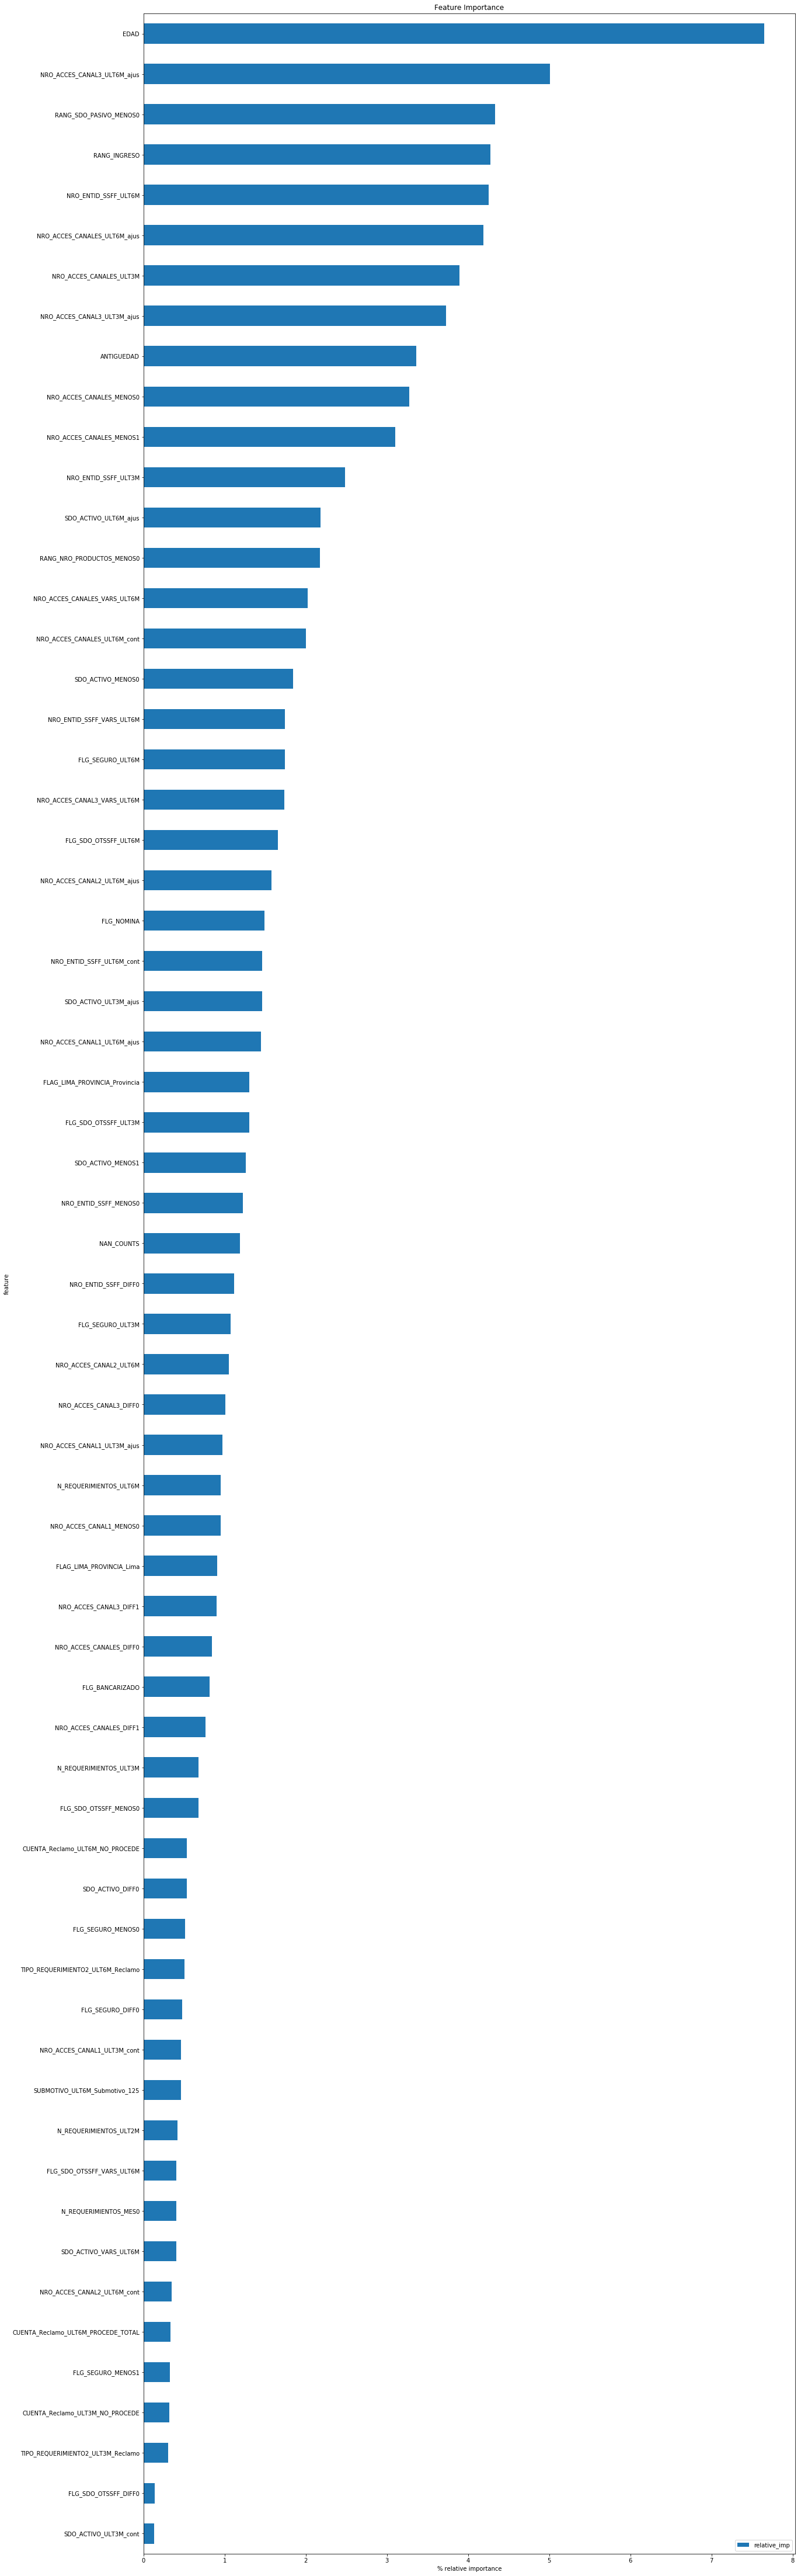

In [902]:
import matplotlib.pylab as plt
imp_feat.sort_values(by = ['importance'], ascending=True).plot(kind='barh', x='feature', y='relative_imp', figsize=(20,80))
plt.title('Feature Importance')
plt.xlabel('% relative importance')
plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

# Submission

In [906]:
y_pred_summit = XGB_predit(model_xgb,np.array(X_summit))
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.409124
1,39861,0.263003
2,38898,0.027814
3,50927,0.023250
4,32969,0.502264


In [907]:
summit_final.to_csv("summit/Summit_xgb_05_63vars.csv", index = False)

In [ ]:
# Summit_xgb_01:         0.29659
# Summit_xgb_02:         0.29288
# Summit_xgb_05_63vars : 0.29267

## X. LIGHTGBM

In [320]:
import lightgbm as lgb

In [321]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [46]:
learning_rate = 0.1
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.6
num_boost_round = 10000
lgb_params = {"objective": "binary",
          "boosting_type": "gbdt",
          "learning_rate": learning_rate,
          "num_leaves": num_leaves,
           "max_bin": 10,
          "feature_fraction": feature_fraction,
          "verbosity": 0,
          "drop_rate": 0.1,
          "is_unbalance": False,
          "max_drop": 50,
          "min_child_samples": 10,
          "min_child_weight": 150,
          "min_split_gain": 0,
          "subsample": 0.9,
              
         "metric" : 'binary_logloss'
          }

In [326]:
# LightGBM params
num_boost_round = 10000

lgb_params = {}

lgb_params['learning_rate'] = 0.014
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.7
lgb_params['subsample_freq'] = 20 # 20
lgb_params['colsample_bytree'] = 0.6   
lgb_params['min_child_samples'] = 20
lgb_params['seed'] = 123 #321
lgb_params['objective'] = 'binary'
#lgb_params['max_depth'] = 12

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 70

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

In [327]:
print('Start training...')
# train
gbm = lgb.train(lgb_params,
                lgb_train,
                num_boost_round=num_boost_round,#20,
                valid_sets=lgb_eval,early_stopping_rounds=100, verbose_eval = 1)
print('Finish training...')

Start training...
[1]	valid_0's binary_logloss: 0.684462
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.676207
[3]	valid_0's binary_logloss: 0.668547
[4]	valid_0's binary_logloss: 0.66061
[5]	valid_0's binary_logloss: 0.652801
[6]	valid_0's binary_logloss: 0.645206
[7]	valid_0's binary_logloss: 0.637804
[8]	valid_0's binary_logloss: 0.631102
[9]	valid_0's binary_logloss: 0.624239
[10]	valid_0's binary_logloss: 0.617631
[11]	valid_0's binary_logloss: 0.611035
[12]	valid_0's binary_logloss: 0.604514
[13]	valid_0's binary_logloss: 0.598602
[14]	valid_0's binary_logloss: 0.592624
[15]	valid_0's binary_logloss: 0.586614
[16]	valid_0's binary_logloss: 0.580662
[17]	valid_0's binary_logloss: 0.574922
[18]	valid_0's binary_logloss: 0.5697
[19]	valid_0's binary_logloss: 0.564282
[20]	valid_0's binary_logloss: 0.558875
[21]	valid_0's binary_logloss: 0.553552
[22]	valid_0's binary_logloss: 0.548402
[23]	valid_0's binary_logloss: 0.543619
[24]	valid_

[206]	valid_0's binary_logloss: 0.306244
[207]	valid_0's binary_logloss: 0.306043
[208]	valid_0's binary_logloss: 0.305873
[209]	valid_0's binary_logloss: 0.305694
[210]	valid_0's binary_logloss: 0.305499
[211]	valid_0's binary_logloss: 0.305303
[212]	valid_0's binary_logloss: 0.305115
[213]	valid_0's binary_logloss: 0.304999
[214]	valid_0's binary_logloss: 0.304821
[215]	valid_0's binary_logloss: 0.304636
[216]	valid_0's binary_logloss: 0.304479
[217]	valid_0's binary_logloss: 0.30436
[218]	valid_0's binary_logloss: 0.304219
[219]	valid_0's binary_logloss: 0.304053
[220]	valid_0's binary_logloss: 0.303907
[221]	valid_0's binary_logloss: 0.303745
[222]	valid_0's binary_logloss: 0.303603
[223]	valid_0's binary_logloss: 0.303451
[224]	valid_0's binary_logloss: 0.303295
[225]	valid_0's binary_logloss: 0.303155
[226]	valid_0's binary_logloss: 0.30303
[227]	valid_0's binary_logloss: 0.302886
[228]	valid_0's binary_logloss: 0.302727
[229]	valid_0's binary_logloss: 0.302592
[230]	valid_0's bi

[420]	valid_0's binary_logloss: 0.293481
[421]	valid_0's binary_logloss: 0.293477
[422]	valid_0's binary_logloss: 0.29348
[423]	valid_0's binary_logloss: 0.293478
[424]	valid_0's binary_logloss: 0.293444
[425]	valid_0's binary_logloss: 0.29342
[426]	valid_0's binary_logloss: 0.293411
[427]	valid_0's binary_logloss: 0.293396
[428]	valid_0's binary_logloss: 0.293394
[429]	valid_0's binary_logloss: 0.29338
[430]	valid_0's binary_logloss: 0.293352
[431]	valid_0's binary_logloss: 0.293345
[432]	valid_0's binary_logloss: 0.293344
[433]	valid_0's binary_logloss: 0.293322
[434]	valid_0's binary_logloss: 0.293301
[435]	valid_0's binary_logloss: 0.293277
[436]	valid_0's binary_logloss: 0.293271
[437]	valid_0's binary_logloss: 0.293257
[438]	valid_0's binary_logloss: 0.293239
[439]	valid_0's binary_logloss: 0.293233
[440]	valid_0's binary_logloss: 0.293224
[441]	valid_0's binary_logloss: 0.29323
[442]	valid_0's binary_logloss: 0.293204
[443]	valid_0's binary_logloss: 0.2932
[444]	valid_0's binary

[623]	valid_0's binary_logloss: 0.292158
[624]	valid_0's binary_logloss: 0.29215
[625]	valid_0's binary_logloss: 0.292132
[626]	valid_0's binary_logloss: 0.292129
[627]	valid_0's binary_logloss: 0.292121
[628]	valid_0's binary_logloss: 0.292117
[629]	valid_0's binary_logloss: 0.292122
[630]	valid_0's binary_logloss: 0.292128
[631]	valid_0's binary_logloss: 0.292137
[632]	valid_0's binary_logloss: 0.292142
[633]	valid_0's binary_logloss: 0.292137
[634]	valid_0's binary_logloss: 0.292118
[635]	valid_0's binary_logloss: 0.292116
[636]	valid_0's binary_logloss: 0.292121
[637]	valid_0's binary_logloss: 0.292124
[638]	valid_0's binary_logloss: 0.292101
[639]	valid_0's binary_logloss: 0.292089
[640]	valid_0's binary_logloss: 0.292098
[641]	valid_0's binary_logloss: 0.292096
[642]	valid_0's binary_logloss: 0.292099
[643]	valid_0's binary_logloss: 0.292104
[644]	valid_0's binary_logloss: 0.292104
[645]	valid_0's binary_logloss: 0.292115
[646]	valid_0's binary_logloss: 0.292115
[647]	valid_0's b

In [342]:
y_pred_proba_train_lgbm = gbm.predict(X_train, num_iteration=gbm.best_iteration)
y_pred_proba_test_lgbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [343]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_lgbm)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_lgbm)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.239457772724
auc - test :  0.291593728652
Diff:         -0.0521


In [ ]:
auc - train:  0.239457772724
auc - test :  0.291593728652
Diff:         -0.0521

In [ ]:
auc - train:  0.251588573827
auc - test :  0.291981161365
Diff:         -0.0404

In [ ]:
lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.7
lgb_params['subsample_freq'] = 20 # 20
lgb_params['colsample_bytree'] = 0.6   
lgb_params['min_child_samples'] = 30
lgb_params['seed'] = 123 #321
lgb_params['objective'] = 'binary'
#lgb_params['max_depth'] = 12

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 60

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True


auc - train:  0.251264229485
auc - test :  0.292220399307
Diff:         -0.041

In [ ]:
lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 20
lgb_params['subsample'] = 0.7
lgb_params['subsample_freq'] = 40 # 20
lgb_params['colsample_bytree'] = 0.6   
lgb_params['min_child_samples'] = 30
lgb_params['seed'] = 321
lgb_params['objective'] = 'binary'
#lgb_params['max_depth'] = 12

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 60

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

auc - train:  0.253086088001
auc - test :  0.29263652718
Diff:         -0.0396

In [ ]:
lgb_params = {}
lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
#lgb_params['max_bin'] = 2 #20
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 20 
lgb_params['colsample_bytree'] = 0.5 #0.8  
#lgb_params['min_child_samples'] = 30
lgb_params['seed'] = 321
lgb_params['objective'] = 'binary'
lgb_params['max_depth'] = 8

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

auc - train:  0.25649837454
auc - test :  0.293171519264
Diff:         -0.0367

In [ ]:
lgb_params = {}
lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 20
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 20 # 20
lgb_params['colsample_bytree'] = 0.8   
#lgb_params['min_child_samples'] = 30
lgb_params['seed'] = 321
lgb_params['objective'] = 'binary'
lgb_params['max_depth'] = 8

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

auc - train:  0.257658845772
auc - test :  0.293374204355
Diff:         -0.0357

In [106]:
len(y_pred)

30000

# Submission

In [330]:
y_pred_summit = gbm.predict(X_summit, num_iteration=gbm.best_iteration)
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.300953
1,39861,0.218514
2,38898,0.019180
3,50927,0.022973
4,32969,0.512322


In [345]:
summit_final.to_csv("summit/Summit_lgbmgb_07_63vars.csv", index = False)

## B. RANDOM FOREST

In [216]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [221]:
model_rf = RandomForestClassifier(n_estimators = 200, random_state = 123, 
                                  n_jobs = 4, max_features = 60, min_samples_leaf = 20,
                                  max_depth = 12) 

In [222]:
# We'll calculate the running time
from time import time
time_star = time()

model_rf.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.84  minutes


In [223]:
y_pred_proba_train_rf = model_rf.predict_proba(X_train)[:,1]
y_pred_proba_test_rf = model_rf.predict_proba(X_test)[:,1]

In [224]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_rf)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_rf)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4)) #0.297296178236

auc - train:  0.265530409159
auc - test :  0.297002517737
Diff:         -0.0315


In [ ]:
model_rf = RandomForestClassifier(n_estimators = 200, random_state = 123, 
                                  n_jobs = 4, max_features = 120, min_samples_leaf = 20,
                                  max_depth = 12) 
auc - train:  0.26580044072
auc - test :  0.296631478562
Diff:         -0.0308

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 123, 
                                  n_jobs = 4, max_features = 80, min_samples_leaf = 10,
                                  max_depth = 13) 

auc - train:  0.24691262464
auc - test :  0.295377862126
Diff:         -0.0485

### Importance Features Random Forest

In [195]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model_rf.feature_importances_

In [196]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,ANTIGUEDAD,1.048812e-01
1,RNK_ANTIGUEDAD,9.825517e-02
2,RANG_INGRESO,9.645583e-02
3,RANG_SDO_PASIVO_MENOS0,8.146840e-02
4,RNK_RANG_SDO_PASIVO_MENOS0,8.064433e-02
5,FLG_SDO_OTSSFF_ULT3M,3.989721e-02
6,NAN_COUNTS,2.667484e-02
7,FLG_SDO_OTSSFF_MENOS0,2.404307e-02
8,EDAD,2.175146e-02
9,NRO_ACCES_CANALES_VARS_ULT6M,1.847743e-02


In [197]:
ftrs.to_excel("features/importancia_param_rf_v06.xlsx", index = False)

# Submission

In [119]:
y_pred_summit = model_rf.predict_proba(X_summit)[:,1]
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.233651
1,39861,0.327233
2,38898,0.020314
3,50927,0.009746
4,32969,0.346704


In [121]:
summit_final.to_csv("summit/Summit_rf_02.csv", index = False)

In [ ]:
# Summit_rf_01: 0.29711

## C. EXTRA TREE

In [225]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier()

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [226]:
model_etc = ExtraTreesClassifier(n_estimators = 100, random_state = 123, 
                                  n_jobs = 4, max_features = 30, min_samples_leaf = 10,
                                  max_depth = 12) 

In [227]:
# We'll calculate the running time
from time import time
time_star = time()

model_etc.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.22  minutes


In [228]:
y_pred_proba_train_etc = model_etc.predict_proba(X_train)[:,1]
y_pred_proba_test_etc = model_etc.predict_proba(X_test)[:,1]

In [229]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_etc)
print ("auc - train: ", log_loss_train) # 0.636076944063

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_etc)
print ("auc - test : ", log_loss_test) # 0.626184570318

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.27699568082
auc - test :  0.304919503682
Diff:         -0.0279


### Importance Features ExtraTrees

In [222]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model_etc.feature_importances_

In [223]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,ANTIGUEDAD,0.222363
1,RANG_SDO_PASIVO_MENOS0,0.203166
2,RANG_INGRESO,0.082496
3,NRO_ACCES_CANALES_ULT6M_cont,0.055587
4,NRO_ENTID_SSFF_ULT6M_cont,0.039909
5,NAN_COUNTS,0.028248
6,FLG_SEGURO_ULT3M,0.027423
7,FLG_SDO_OTSSFF_ULT3M,0.024923
8,NRO_ACCES_CANALES_VARS_ULT6M,0.024360
9,FLG_SEGURO_ULT6M,0.023574


## D. Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [94]:
model_gbm = GradientBoostingClassifier(n_estimators = 1500, 
                                       random_state = 123, 
                                       learning_rate = 0.015,# 0.012
                                       subsample = 0.6,
                                       min_samples_leaf = 20,
                                       max_features = 30,
                                       max_depth = 6,
                                       verbose = 1)

In [95]:
# We'll calculate the running time
from time import time
time_star = time()

model_gbm.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8594           0.0071            5.77m
         2           0.8466           0.0070            5.66m
         3           0.8466           0.0062            5.46m
         4           0.8392           0.0060            5.53m
         5           0.8259           0.0060            5.79m
         6           0.8274           0.0053            5.75m
         7           0.8173           0.0053            5.70m
         8           0.8119           0.0050            5.70m
         9           0.8076           0.0048            5.69m
        10           0.8071           0.0047            5.74m
        20           0.7633           0.0032            5.39m
        30           0.7292           0.0025            5.50m
        40           0.7138           0.0020            5.47m
        50           0.6898           0.0014            5.34m
        60           0.6734           0.0014            5.39m
       

In [96]:
y_pred_proba_train_gbm = model_gbm.predict_proba(X_train)[:,1]
y_pred_proba_test_gbm = model_gbm.predict_proba(X_test)[:,1]

In [97]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_gbm)
print ("auc - train: ", log_loss_train) # 0.640400315974

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_gbm)
print ("auc - test : ", log_loss_test) # 0.63455632609

print("Diff:        ", round(log_loss_train-log_loss_test,4))


auc - train:  0.239270518009
auc - test :  0.294220652312
Diff:         -0.055


In [ ]:
model_gbm = GradientBoostingClassifier(n_estimators = 1000, 
                                       random_state = 123, 
                                       learning_rate = 0.012,# 0.012
                                       subsample = 0.8,
                                       min_samples_leaf = 20,
                                       max_features = 25,
                                       max_depth = 7,
                                       verbose = 1)

auc - train:  0.24513610136
auc - test :  0.292361537913
Diff:         -0.0472

In [ ]:
model_gbm = GradientBoostingClassifier(n_estimators = 300, 
                                       random_state = 123, 
                                       learning_rate = 0.012,
                                       subsample = 0.8,
                                       min_samples_leaf = 20,
                                       max_features = 25,
                                       max_depth = 6,
                                       verbose = 1)

auc - train:  0.26426364331
auc - test :  0.293954855123
Diff:         -0.0297

In [ ]:
model_gbm = GradientBoostingClassifier(n_estimators = 1000, 
                                       random_state = 123, 
                                       learning_rate = 0.025,
                                       subsample = 0.8,
                                       min_samples_leaf = 10,
                                       max_features = 80,
                                       max_depth = 5)

auc - train:  0.251736517166
auc - test :  0.2962538145
Diff:         -0.0445

### Importance Features Gradiend Boosting

In [273]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model_gbm.feature_importances_

In [274]:
ftrs = features.sort_values(by = ['importance','feature'],ascending=False)
ftrs = ftrs.reset_index(drop = True)
ftrs

,feature,importance
0,EDAD,0.050887
1,NRO_ACCES_CANAL3_ULT6M_ajus,0.044731
2,RANG_INGRESO,0.044325
3,RANG_SDO_PASIVO_MENOS0,0.042478
4,NRO_ACCES_CANALES_ULT6M_ajus,0.038857
5,NRO_ACCES_CANALES_ULT3M,0.038529
6,ANTIGUEDAD,0.036466
7,NRO_ACCES_CANAL3_ULT3M_ajus,0.034936
8,RNK_RANG_SDO_PASIVO_MENOS0,0.032401
9,NRO_ENTID_SSFF_ULT6M,0.031786


# Submission

In [421]:
y_pred_summit = model_gbm.predict_proba(X_summit)[:,1]
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.458418
1,39861,0.289899
2,38898,0.025727
3,50927,0.020427
4,32969,0.449831


In [422]:
summit_final.to_csv("summit/Summit_gbm_02.csv", index = False)

## E. LogisticRegression

In [422]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [423]:
model_rlog = LogisticRegression(C=1, solver='sag', max_iter = 100,
                                random_state = 123)

In [424]:
# We'll calculate the running time
from time import time
time_star = time()

model_rlog.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.11  minutes


In [429]:
y_pred_proba_train_rlog = model_rlog.predict_proba(X_train)[:,1]
y_pred_proba_test_rlog = model_rlog.predict_proba(X_test)[:,1]

In [430]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_rlog)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.roc_auc_score(y_test.astype('int'),y_pred_proba_test_rlog)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.649446871603
auc - test :  0.636664649509
Diff:         0.0128


In [ ]:
auc - train:  0.636281938213
auc - test :  0.631920527734
Diff:         0.0044

## F. AdaBoost

In [155]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [260]:
base_estimator_model = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 20,
                                   max_depth = 8) 

In [275]:
model_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=base_estimator_model,
                                  learning_rate=0.01, n_estimators=150, random_state=321)

In [276]:
# We'll calculate the running time
from time import time
time_star = time()

model_ada.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  1.72  minutes


In [277]:
y_pred_proba_train_gbm = model_ada.predict_proba(X_train)[:,1]
y_pred_proba_test_gbm = model_ada.predict_proba(X_test)[:,1]

In [278]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_gbm)
print ("auc - train: ", log_loss_train) # 0.640400315974

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_gbm)
print ("auc - test : ", log_loss_test) # 0.63455632609

print("Diff:        ", round(log_loss_train-log_loss_test,4))


auc - train:  0.26771061765
auc - test :  0.327955700515
Diff:         -0.0602


In [ ]:
auc - train:  0.296883687653
auc - test :  0.323401895283
Diff:         -0.0265

## G. Decision Tree Clasiffier

In [230]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [231]:
model_tree = DecisionTreeClassifier(random_state = 123, min_samples_leaf = 30,
                                   max_depth = 12) 

In [232]:
# We'll calculate the running time
from time import time
time_star = time()

model_tree.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.03  minutes


In [233]:
y_pred_proba_train_rf = model_tree.predict_proba(X_train)[:,1]
y_pred_proba_test_rf = model_tree.predict_proba(X_test)[:,1]

In [234]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_rf)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_rf)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4)) #0.297296178236

auc - train:  0.274544736753
auc - test :  0.522362822186
Diff:         -0.2478


## X. OTROS MODELOS

In [139]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler().fit(X)
#scaler = Normalizer()

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_train_scala = scaler.transform(X_train)
X_test_scala = scaler.transform(X_test)

X_train_scala = pd.DataFrame(X_train_scala,columns = X_train.columns)
X_test_scala = pd.DataFrame(X_test_scala,columns = X_test.columns)

In [143]:
X.ANTIGUEDAD.value_counts()

 0.0     34701
 4.0      4492
 5.0      4378
 3.0      3845
 6.0      3783
 2.0      3178
 1.0      3164
 9.0      3063
 8.0      2841
 7.0      2663
 10.0     2114
-99.0     1762
 99.0       16
Name: ANTIGUEDAD, dtype: int64

In [140]:
X_train.head()

,RNK_ANTIGUEDAD,RNK_RANG_SDO_PASIVO_MENOS0,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,RANG_INGRESO,NAN_COUNTS,FLG_SDO_OTSSFF_ULT3M,EDAD,FLG_SDO_OTSSFF_MENOS0,N_REQUERIMIENTOS_ULT6M,...,NRO_ACCES_CANAL1_ULT3M_cont,SDO_ACTIVO_VARS_ULT6M,SUBMOTIVO_ULT6M_Submotivo_125,N_REQUERIMIENTOS_ULT2M,CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL,TIPO_REQUERIMIENTO2_ULT3M_Reclamo,NRO_ACCES_CANAL2_ULT6M_cont,SDO_ACTIVO_ULT3M_cont,N_REQUERIMIENTOS_MES0,CUENTA_Reclamo_ULT3M_NO_PROCEDE
0,0,2,0.0,4,3,0,0,23.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
1,1,1,4.0,1,1,0,0,23.0,0,1.0,...,0,0,0.0,1.0,0.0,0.0,2,0,0.0,0.0
2,1,2,1.0,2,2,0,3,26.0,1,2.0,...,3,5,1.0,2.0,1.0,2.0,1,3,2.0,1.0
3,0,0,0.0,0,0,1,0,70.0,0,0.0,...,1,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0
4,1,2,5.0,4,3,0,3,26.0,1,1.0,...,2,0,0.0,1.0,1.0,1.0,6,0,1.0,0.0


In [141]:
X_train_scala.head()

,RNK_ANTIGUEDAD,RNK_RANG_SDO_PASIVO_MENOS0,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,RANG_INGRESO,NAN_COUNTS,FLG_SDO_OTSSFF_ULT3M,EDAD,FLG_SDO_OTSSFF_MENOS0,N_REQUERIMIENTOS_ULT6M,...,NRO_ACCES_CANAL1_ULT3M_cont,SDO_ACTIVO_VARS_ULT6M,SUBMOTIVO_ULT6M_Submotivo_125,N_REQUERIMIENTOS_ULT2M,CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL,TIPO_REQUERIMIENTO2_ULT3M_Reclamo,NRO_ACCES_CANAL2_ULT6M_cont,SDO_ACTIVO_ULT3M_cont,N_REQUERIMIENTOS_MES0,CUENTA_Reclamo_ULT3M_NO_PROCEDE
0,0.0,1.0,0.500000,0.285714,0.333333,0.00,0.0,0.619289,0.0,0.0000,...,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000,0.0
1,0.5,0.5,0.520202,0.071429,0.111111,0.00,0.0,0.619289,0.0,0.0625,...,0.000000,0.0,0.000000,0.1,0.000,0.000000,0.333333,0.0,0.000,0.0
2,0.5,1.0,0.505051,0.142857,0.222222,0.00,1.0,0.634518,1.0,0.1250,...,1.000000,1.0,0.083333,0.2,0.125,0.166667,0.166667,1.0,0.250,0.1
3,0.0,0.0,0.500000,0.000000,0.000000,0.25,0.0,0.857868,0.0,0.0000,...,0.333333,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000,0.0
4,0.5,1.0,0.525253,0.285714,0.333333,0.00,1.0,0.634518,1.0,0.0625,...,0.666667,0.0,0.000000,0.1,0.125,0.083333,1.000000,0.0,0.125,0.0


In [221]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [352]:
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [348]:
model_rlog = KNeighborsClassifier(n_neighbors=10,n_jobs=4 ) #weights='distance'

In [279]:
model_rlog = GradientBoostingClassifier(n_estimators = 1000, 
                                       random_state = 123, 
                                       learning_rate = 0.012,
                                       subsample = 0.8,
                                       min_samples_leaf = 20,
                                       max_features = 25,
                                       max_depth = 6,
                                       verbose = 1)

In [395]:
model_rlog = LogisticRegression(C=0.01)

In [365]:
GaussianNB()

GaussianNB(priors=None)

In [375]:
model_rlog = GaussianNB()

In [396]:
# We'll calculate the running time
from time import time
time_star = time()

model_rlog.fit(X_train_scala, y_train)
#model_rlog.fit(X_train, y_train)

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.02  minutes


In [397]:
from time import time
time_star = time()
y_pred_proba_train_rlog = model_rlog.predict_proba(X_train_scala)[:,1]
y_pred_proba_test_rlog = model_rlog.predict_proba(X_test_scala)[:,1]

#y_pred_proba_train_rlog = model_rlog.predict_proba(X_train)[:,1]
#y_pred_proba_test_rlog = model_rlog.predict_proba(X_test)[:,1]

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.0  minutes


In [398]:
model_rlog.predict_proba(X_test_scala)

array([[ 0.81163138,  0.18836862],
       [ 0.85838107,  0.14161893],
       [ 0.77770862,  0.22229138],
       ..., 
       [ 0.97866294,  0.02133706],
       [ 0.84725147,  0.15274853],
       [ 0.87686788,  0.12313212]])

In [399]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_rlog)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_rlog)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.337226544035
auc - test :  0.339073596853
Diff:         -0.0018


In [ ]:
auc - train:  0.336168140252
auc - test :  0.338977867936
Diff:         -0.0028

In [ ]:
auc - train:  0.26426364331
auc - test :  0.293954855123
Diff:         -0.0297

# Ensemble Models

In [293]:
# Avg 2 models:
subm1 = pd.read_csv('summit/ens12_3mod_gbm02_xgb06_lgbm06.csv') # 
subm2 = pd.read_csv('summit/ens05_xgb5_xgb6.csv') # 

In [294]:
subm1.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.400466
1,39861,0.270875
2,38898,0.024503
3,50927,0.019110
4,32969,0.483532


In [295]:
subm2.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.434609
1,39861,0.277443
2,38898,0.027854
3,50927,0.018458
4,32969,0.499888


In [296]:
from scipy.stats.stats import pearsonr
pearsonr(subm1.ATTRITION,subm2.ATTRITION)

(0.99827256040369061, 0.0)

In [297]:
subm_ens1 = pd.merge(subm1, subm2, on = 'ID_CORRELATIVO')

In [298]:
subm_ens1.head()

,ID_CORRELATIVO,ATTRITION_x,ATTRITION_y
0,47411,0.400466,0.434609
1,39861,0.270875,0.277443
2,38898,0.024503,0.027854
3,50927,0.019110,0.018458
4,32969,0.483532,0.499888


In [299]:
target_col = ['ATTRITION']
for j in (target_col):
    subm_ens1[j] = subm_ens1[j+"_x"]/2 + subm_ens1[j+"_y"]/2

In [62]:
subm_ens1.head()

,ID_CORRELATIVO,ATTRITION_x,ATTRITION_y,ATTRITION
0,47411,0.458418,0.409124,0.433771
1,39861,0.289899,0.263003,0.276451
2,38898,0.025727,0.027814,0.026771
3,50927,0.020427,0.023250,0.021838
4,32969,0.449831,0.502264,0.476047


In [300]:
subm_ens1[['ID_CORRELATIVO','ATTRITION']].to_csv("summit/ens13_ens05_ens12.csv", index = False)

In [ ]:
# 0.29263

In [356]:
# Avg 3 models:
subm1 = pd.read_csv('summit/Summit_gbm_02.csv') # 
subm2 = pd.read_csv('summit/Summit_xgb_06_65vars.csv') # 
subm3 = pd.read_csv('summit/Summit_lgbmgb_07_63vars.csv') # 

In [357]:
subm1.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.458418
1,39861,0.289899
2,38898,0.025727
3,50927,0.020427
4,32969,0.449831


In [358]:
subm2.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.460095
1,39861,0.291883
2,38898,0.027894
3,50927,0.013667
4,32969,0.497511


In [359]:
subm3.head()

,ID_CORRELATIVO,ATTRITION
0,47411,0.300953
1,39861,0.218514
2,38898,0.019180
3,50927,0.022973
4,32969,0.512322


In [360]:
from scipy.stats.stats import pearsonr
pearsonr(subm2.ATTRITION,subm3.ATTRITION)

(0.98657649635024025, 0.0)

In [361]:
subm_ens3 = pd.merge(subm1, subm2, on = 'ID_CORRELATIVO')
subm_ens3 = pd.merge(subm_ens3, subm3, on = 'ID_CORRELATIVO')
subm_ens3.rename(index=str, columns={"ATTRITION": "ATTRITION_z"}, inplace = True)

In [362]:
subm_ens3.head()

,ID_CORRELATIVO,ATTRITION_x,ATTRITION_y,ATTRITION_z
0,47411,0.458418,0.460095,0.300953
1,39861,0.289899,0.291883,0.218514
2,38898,0.025727,0.027894,0.019180
3,50927,0.020427,0.013667,0.022973
4,32969,0.449831,0.497511,0.512322


In [363]:
target_col = ['ATTRITION']
for j in (target_col):
    subm_ens3[j] = subm_ens3[j+"_x"]/3 + subm_ens3[j+"_y"]/3 + subm_ens3[j+"_z"]/3
subm_ens3.head()

,ID_CORRELATIVO,ATTRITION_x,ATTRITION_y,ATTRITION_z,ATTRITION
0,47411,0.458418,0.460095,0.300953,0.406489
1,39861,0.289899,0.291883,0.218514,0.266766
2,38898,0.025727,0.027894,0.019180,0.024267
3,50927,0.020427,0.013667,0.022973,0.019022
4,32969,0.449831,0.497511,0.512322,0.486554


In [364]:
subm_ens3[['ID_CORRELATIVO','ATTRITION']].to_csv("summit/ens13_3mod_gbm02_xgb06_lgbm07.csv", index = False)

# Cross Validation

In [45]:
# Data To Cross Validation
#X_train_cv  = X.copy()
#y_train_cv  = y.copy()
X_train_cv  = X_train.copy()
y_train_cv  = y_train.copy()

In [46]:
import random
n_nums = list(range(len(X_train_cv)))
random.shuffle(n_nums)

In [37]:
#pd.DataFrame(n_nums, columns = ["randoms"]).to_csv("data/randoms.csv", index = False)

In [47]:
X_train_cv = X_train_cv.ix[n_nums].reset_index(drop = True)
y_train_cv = y_train_cv.ix[n_nums].reset_index(drop = True)
X_train_cv.head()

,RNK_ANTIGUEDAD,RNK_RANG_SDO_PASIVO_MENOS0,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,RANG_INGRESO,NAN_COUNTS,FLG_SDO_OTSSFF_ULT3M,EDAD,FLG_SDO_OTSSFF_MENOS0,N_REQUERIMIENTOS_ULT6M,...,NRO_ACCES_CANAL1_ULT3M_cont,SDO_ACTIVO_VARS_ULT6M,SUBMOTIVO_ULT6M_Submotivo_125,N_REQUERIMIENTOS_ULT2M,CUENTA_Reclamo_ULT6M_PROCEDE_TOTAL,TIPO_REQUERIMIENTO2_ULT3M_Reclamo,NRO_ACCES_CANAL2_ULT6M_cont,SDO_ACTIVO_ULT3M_cont,N_REQUERIMIENTOS_MES0,CUENTA_Reclamo_ULT3M_NO_PROCEDE
0,0,1,0.0,1,4,0,3,29.0,1,0.0,...,0,3,0.0,0.0,0.0,0.0,0,3,0.0,0.0
1,1,1,3.0,1,2,0,3,28.0,1,1.0,...,1,0,0.0,0.0,0.0,1.0,0,0,0.0,1.0
2,0,1,0.0,1,0,2,0,-99.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,1,0,0.0,0.0
3,1,2,1.0,10,4,0,0,38.0,0,1.0,...,0,0,0.0,1.0,0.0,0.0,0,0,0.0,0.0
4,0,1,0.0,1,0,1,0,24.0,0,0.0,...,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 987, 
                                  n_jobs = 4, max_features = 30, min_samples_leaf = 20,
                                  max_depth = 15) 

In [48]:
classifier = GradientBoostingClassifier(n_estimators = 1000, 
                                       random_state = 123, 
                                       learning_rate = 0.012,# 0.012
                                       subsample = 0.8,
                                       min_samples_leaf = 20,
                                       max_features = 25,
                                       max_depth = 7,
                                       verbose = 0)

In [52]:
len(X_train_cv)

56000

In [ ]:
# Cros Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import log_loss
k = 10 # n folds
cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 0)

results_train = []
results_test = []
list_models = [] # np.zeros(k)

i = 0
for traincv, testcv in cv:
        model = clone(classifier)
        model = model.fit(X_train_cv.values[traincv], y_train_cv[traincv])
        probas_train = model.predict_proba(X_train_cv.values[traincv])[:,1]
        probas_test = model.predict_proba(X_train_cv.values[testcv])[:,1]
        log_loss_pred_train = log_loss(y_train_cv[traincv],probas_train)
        log_loss_pred_test = log_loss(y_train_cv[testcv],probas_test)
        results_train.append(log_loss_pred_train)
        results_test.append(log_loss_pred_test)
        list_models.append(model)
        #list_models[i] = model
        print("Ok - ",str(i),": ", str(log_loss_pred_train), str(log_loss_pred_test))
        print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))
        #print(model.predict_proba(X_summit)[:,1][0:5])
        #print("")
        i = i + 1

print("Listo!")
result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

Ok -  0 :  0.241076945421 0.308151683876
Mean Target:  0.1541 0.1652
Ok -  1 :  0.242706600636 0.283985121656
Mean Target:  0.1558 0.1504
Ok -  2 :  0.241338221297 0.293737039452
Mean Target:  0.1556 0.152
Ok -  3 :  0.242860863407 0.280641293351
Mean Target:  0.1556 0.152
Ok -  4 :  0.241037340701 0.301357384448
Mean Target:  0.1548 0.1588
Ok -  5 :  0.242923221725 0.286905956883
Mean Target:  0.1561 0.1471


In [54]:
results_test

[0.30815168387566594,
 0.28398512165647416,
 0.29373703945240681,
 0.2806412933505591,
 0.30135738444768184,
 0.28690595688308057,
 0.30530500804913596,
 0.30067015953928172,
 0.29202290432356198,
 0.30139123731730338]

In [50]:
print(result_final_train)
print(result_final_test)

0.241786760681
0.29541677889


In [ ]:
0.248253997916
0.294056383597

# XX. LightGBM CV

In [193]:
X_train_cv  = X.copy()
y_train_cv  = y.copy()

In [194]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [269]:
# LightGBM params
num_boost_round = 10000

lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 20
lgb_params['subsample'] = 0.7
lgb_params['subsample_freq'] = 40 # 20
lgb_params['colsample_bytree'] = 0.6   
lgb_params['min_child_samples'] = 30
lgb_params['seed'] = 321
lgb_params['objective'] = 'binary'
#lgb_params['max_depth'] = 12

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 60

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

In [228]:
# LightGBM params
num_boost_round = 10000

lgb_params = {}

lgb_params['learning_rate'] = 0.012
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 20
lgb_params['subsample'] = 0.7
lgb_params['subsample_freq'] = 20 # 20
lgb_params['colsample_bytree'] = 0.6   
lgb_params['min_child_samples'] = 8
lgb_params['seed'] = 321
lgb_params['objective'] = 'binary'
#lgb_params['max_depth'] = 9

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 40

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

In [230]:
num_boost_round = 10000

lgb_params = {}

lgb_params['learning_rate'] = 0.01
lgb_params['n_estimators'] = 2000
lgb_params['max_bin'] = 10
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 20 # 20
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 10
lgb_params['seed'] = 123 #321
lgb_params['objective'] = 'binary'
lgb_params['max_depth'] = 10

#lgb_params['min_data_in_leaf'] = 50

lgb_params['num_leaves'] = 50

lgb_params['metric'] = 'binary_logloss'
lgb_params['training_metric'] = True

In [232]:
# Cros Validation
from sklearn.base import clone
from sklearn import cross_validation
from sklearn.metrics import log_loss
k = 5 
cv = cross_validation.KFold(len(X_train_cv), n_folds=k, random_state = 1, shuffle = True)

results_train = []
results_test = []
list_models = [] 

i = 0
for traincv, testcv in cv:
        lgb_train = lgb.Dataset(X_train_cv.values[traincv], y_train_cv[traincv])
        lgb_eval = lgb.Dataset(X_train_cv.values[testcv], y_train_cv[testcv], reference=lgb_train)
        model = lgb.train(lgb_params,
                          lgb_train,
                          num_boost_round=num_boost_round,
                          valid_sets = lgb_eval,
                          early_stopping_rounds = 50,
                          verbose_eval = 0)
        probas_train = model.predict(X_train_cv.values[traincv], num_iteration=model.best_iteration)
        probas_test = model.predict(X_train_cv.values[testcv], num_iteration=model.best_iteration)
        log_loss_pred_train = log_loss(y_train_cv[traincv],probas_train)
        log_loss_pred_test = log_loss(y_train_cv[testcv],probas_test)
        
        results_train.append(log_loss_pred_train)
        results_test.append(log_loss_pred_test)
        list_models.append(model)
        #list_models[i] = model
        print("Ok - ",str(i),": ", str(log_loss_pred_train), str(log_loss_pred_test))
        print("Mean Target: ", str(round(y_train_cv[traincv].mean(),4)), str(round(y_train_cv[testcv].mean(),4)))
        #print(model.predict_proba(X_summit)[:,1][0:5])
        #print("")
        i = i + 1

print("Listo!")
result_final_train = np.mean(results_train)
result_final_test = np.mean(results_test)

### TRAIN
print ("auc - train: ", result_final_train) 
### TEST
print ("auc - test : ", result_final_test) 

print("Diff:        ", round(result_final_train-result_final_test,4))

Ok -  0 :  0.259130227483 0.30399617584
Mean Target:  0.1541 0.1567
Ok -  1 :  0.258596335532 0.287384700485
Mean Target:  0.1558 0.1496
Ok -  2 :  0.253580181953 0.29589667181
Mean Target:  0.154 0.1571
Ok -  3 :  0.255421010182 0.299163688368
Mean Target:  0.1542 0.1564
Ok -  4 :  0.248908078848 0.288618644226
Mean Target:  0.1549 0.1532
Listo!
auc - train:  0.255127166799
auc - test :  0.295011976146
Diff:         -0.0399


In [233]:
### TRAIN
print ("auc - train: ", result_final_train) 
### TEST
print ("auc - test : ", result_final_test) 

print("Diff:        ", round(result_final_train-result_final_test,4))

auc - train:  0.255127166799
auc - test :  0.295011976146
Diff:         -0.0399


In [264]:
list_models[3]

# Submission

In [182]:
y_pred_summit = list_models[3].predict(X_summit, num_iteration=gbm.best_iteration)
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head()

NameError: name 'list_models' is not defined

In [ ]:
summit_final.to_csv("summit/Summit_lgbm_05_63vars_round1.csv", index = False)

In [363]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [59]:
seed = 321
scoring = 'log_loss'

In [61]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_cv, y_train_cv, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74

LR: -0.412980 (0.047261)


C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74

LDA: -0.349892 (0.010282)


C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74

CART: -6.354432 (0.148963)


C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74

NB: -2.674197 (0.262002)


C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [598]:
y_pred_proba_train_gbm = list_models[6].predict_proba(X_train_cv)[:,1]
y_pred_proba_test_gbm = list_models[6].predict_proba(X_test)[:,1]

In [599]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train_cv.astype('int'),y_pred_proba_train_gbm)
print ("auc - train: ", log_loss_train) # 0.640400315974

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_gbm)
print ("auc - test : ", log_loss_test) # 0.63455632609

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.273523390925
auc - test :  0.272117269375
Diff:         0.0014


# Submission

In [ ]:

ID_CORRELATIVO	ATTRITION
0	47411	0.260268
1	39861	0.248837
2	38898	0.021703
3	50927	0.012945
4	32969	0.374295

In [604]:
model_summit = list_models[4]
print(model_summit.predict_proba(X_summit)[:,1][0:5])

[ 0.2742165   0.28231208  0.01864219  0.01408989  0.35775278]


In [605]:
y_pred_summit = model_summit.predict_proba(X_summit)[:,1]
summit_final = pd.concat( [test_clientes_ori.ix[:,'ID_CORRELATIVO'] , pd.DataFrame(y_pred_summit,columns = ['ATTRITION'] )], axis = 1)
summit_final.head(10)

,ID_CORRELATIVO,ATTRITION
0,47411,0.274216
1,39861,0.282312
2,38898,0.018642
3,50927,0.014090
4,32969,0.357753
5,89661,0.305927
6,12197,0.025590
7,71520,0.043402
8,59759,0.289963
9,36743,0.059069


In [606]:
summit_final.to_csv("summit/Summit_rfcv04_04.csv", index = False)

# Ensemble Models

In [ ]:
X_train_cv
y_train_cv

In [415]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

seed = 123
kfold = model_selection.KFold(n_splits=5, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
results = model_selection.cross_val_score(ensemble, X_train_cv, y_train_cv, cv=kfold , verbose  = 1, scoring = 'log_loss')
print(results.mean())

C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


-0.391090080481


C:\Users\S74010\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:137: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.3s finished


In [416]:
results

array([-0.40975463, -0.38110199, -0.41223708, -0.37590308, -0.37645362])

In [85]:
import xgboost as xgb

def runXGB_train(train_X, train_y, test_X, test_y):
        params = {}
        params["objective"] = "binary:logistic"#"reg:linear"
        params["eta"] = 0.012
        params["min_child_weight"] = 9
        params["subsample"] = 0.8 
        params["colsample_bytree"] = 0.7 
        params["silent"] = 1         
        params["max_depth"] = 7
        params["eval_metric"] = 'logloss'
        params["seed"] = 321 
        plst = list(params.items())
        num_rounds = 3000 

        xgtrain = xgb.DMatrix(train_X, label=train_y)
        xgtest = xgb.DMatrix(test_X, label=test_y)
        
        watchlist = [(xgtrain, 'train'),(xgtest, 'test')]
        
        model = xgb.train(plst, xgtrain, num_rounds, evals = watchlist, early_stopping_rounds  = 50, verbose_eval = True)
       
        return (model)

def runXGB_predict(model, test_X):
        # Usando la Mejor iteración:    
        xgtest = xgb.DMatrix(test_X)
        pred = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
        return (pred)

### Entrenar todos los modelos

In [28]:
X_train.columns

Index(['ANTIGUEDAD', 'RANG_SDO_PASIVO_MENOS0', 'RANG_INGRESO', 'NAN_COUNTS',
       'FLG_SDO_OTSSFF_ULT3M', 'EDAD', 'FLG_SDO_OTSSFF_MENOS0',
       'N_REQUERIMIENTOS_ULT6M', 'RANG_NRO_PRODUCTOS_MENOS0',
       'NRO_ENTID_SSFF_ULT6M_cont', 'NRO_ACCES_CANALES_VARS_ULT6M',
       'NRO_ENTID_SSFF_ULT6M', 'NRO_ACCES_CANALES_ULT6M_cont',
       'NRO_ACCES_CANAL3_ULT6M_ajus', 'FLG_SEGURO_ULT3M',
       'NRO_ACCES_CANALES_ULT6M_ajus', 'NRO_ACCES_CANALES_MENOS0',
       'FLG_SDO_OTSSFF_ULT6M', 'FLG_SEGURO_ULT6M', 'NRO_ACCES_CANALES_MENOS1',
       'NRO_ACCES_CANALES_ULT3M', 'NRO_ACCES_CANAL3_VARS_ULT6M',
       'NRO_ACCES_CANAL3_ULT3M_ajus', 'FLG_NOMINA', 'NRO_ENTID_SSFF_ULT3M',
       'NRO_ENTID_SSFF_VARS_ULT6M', 'FLG_SEGURO_MENOS1',
       'NRO_ENTID_SSFF_DIFF0', 'FLAG_LIMA_PROVINCIA_Provincia',
       'NRO_ACCES_CANALES_DIFF0', 'NRO_ACCES_CANALES_DIFF1',
       'FLG_SEGURO_DIFF0', 'NRO_ENTID_SSFF_MENOS0', 'NRO_ACCES_CANAL3_DIFF1',
       'SDO_ACTIVO_ULT6M_ajus', 'FLAG_LIMA_PROVINCIA_Lima',
 

In [78]:
var_segmentacion = "FLG_BANCARIZADO"
lista_Junction = X_train[var_segmentacion].unique()
lista_Junction

array([0, 1], dtype=int64)

In [86]:
list_models = []
for valor in lista_Junction:
    print("\n-- Entrenando Modelo: " + str(valor))
    X_train_temp = X_train[X_train[var_segmentacion] == valor]
    y_train_temp = y_train[X_train[var_segmentacion] == valor]
    X_test_temp = X_test[X_test[var_segmentacion] == valor]
    y_test_temp = y_test[X_test[var_segmentacion] == valor]
    model = runXGB_train(np.array(X_train_temp), y_train_temp,np.array(X_test_temp), y_test_temp)
    print(model)
    list_models.append(model)
list_models


-- Entrenando Modelo: 0
[0]	train-logloss:0.6877	test-logloss:0.68768
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.682449	test-logloss:0.682451
[2]	train-logloss:0.675519	test-logloss:0.675512
[3]	train-logloss:0.668973	test-logloss:0.668825
[4]	train-logloss:0.662331	test-logloss:0.662135
[5]	train-logloss:0.655766	test-logloss:0.655519
[6]	train-logloss:0.649845	test-logloss:0.649599
[7]	train-logloss:0.643597	test-logloss:0.643273
[8]	train-logloss:0.637401	test-logloss:0.63706
[9]	train-logloss:0.631425	test-logloss:0.631053
[10]	train-logloss:0.627075	test-logloss:0.626711
[11]	train-logloss:0.621269	test-logloss:0.620883
[12]	train-logloss:0.615805	test-logloss:0.615394
[13]	train-logloss:0.610187	test-logloss:0.609787
[14]	train-logloss:0.606195	test-logloss:0.605837
[15]	train-logloss:0.600829	test-logloss:0.60044
[16]	train-logloss:0.595596	test-logloss:

[161]	train-logloss:0.324073	test-logloss:0.332605
[162]	train-logloss:0.323364	test-logloss:0.331989
[163]	train-logloss:0.322673	test-logloss:0.33139
[164]	train-logloss:0.322277	test-logloss:0.331128
[165]	train-logloss:0.321904	test-logloss:0.330819
[166]	train-logloss:0.321501	test-logloss:0.330605
[167]	train-logloss:0.320872	test-logloss:0.330102
[168]	train-logloss:0.320189	test-logloss:0.32949
[169]	train-logloss:0.319529	test-logloss:0.328916
[170]	train-logloss:0.318902	test-logloss:0.328334
[171]	train-logloss:0.318557	test-logloss:0.328051
[172]	train-logloss:0.318276	test-logloss:0.327866
[173]	train-logloss:0.317691	test-logloss:0.327345
[174]	train-logloss:0.317407	test-logloss:0.327179
[175]	train-logloss:0.316849	test-logloss:0.326697
[176]	train-logloss:0.316518	test-logloss:0.326474
[177]	train-logloss:0.315916	test-logloss:0.325962
[178]	train-logloss:0.315404	test-logloss:0.325489
[179]	train-logloss:0.315091	test-logloss:0.325263
[180]	train-logloss:0.314509	test

[323]	train-logloss:0.276392	test-logloss:0.297862
[324]	train-logloss:0.276227	test-logloss:0.297785
[325]	train-logloss:0.276166	test-logloss:0.297765
[326]	train-logloss:0.276089	test-logloss:0.297723
[327]	train-logloss:0.275932	test-logloss:0.297585
[328]	train-logloss:0.27575	test-logloss:0.297537
[329]	train-logloss:0.275676	test-logloss:0.297534
[330]	train-logloss:0.27552	test-logloss:0.297456
[331]	train-logloss:0.27536	test-logloss:0.29735
[332]	train-logloss:0.275168	test-logloss:0.297275
[333]	train-logloss:0.274971	test-logloss:0.297215
[334]	train-logloss:0.274812	test-logloss:0.297116
[335]	train-logloss:0.274746	test-logloss:0.297103
[336]	train-logloss:0.27458	test-logloss:0.296979
[337]	train-logloss:0.274412	test-logloss:0.296883
[338]	train-logloss:0.274271	test-logloss:0.296804
[339]	train-logloss:0.274138	test-logloss:0.296715
[340]	train-logloss:0.273995	test-logloss:0.296652
[341]	train-logloss:0.273851	test-logloss:0.29656
[342]	train-logloss:0.273718	test-log

[485]	train-logloss:0.260568	test-logloss:0.292948
[486]	train-logloss:0.26052	test-logloss:0.292946
[487]	train-logloss:0.260426	test-logloss:0.292914
[488]	train-logloss:0.260359	test-logloss:0.292884
[489]	train-logloss:0.260318	test-logloss:0.292876
[490]	train-logloss:0.260242	test-logloss:0.292876
[491]	train-logloss:0.260156	test-logloss:0.292863
[492]	train-logloss:0.260089	test-logloss:0.292851
[493]	train-logloss:0.260004	test-logloss:0.292871
[494]	train-logloss:0.25996	test-logloss:0.292872
[495]	train-logloss:0.259896	test-logloss:0.292885
[496]	train-logloss:0.259855	test-logloss:0.292882
[497]	train-logloss:0.259797	test-logloss:0.292894
[498]	train-logloss:0.259754	test-logloss:0.292891
[499]	train-logloss:0.25966	test-logloss:0.29293
[500]	train-logloss:0.259594	test-logloss:0.292976
[501]	train-logloss:0.259549	test-logloss:0.292985
[502]	train-logloss:0.259504	test-logloss:0.292989
[503]	train-logloss:0.259427	test-logloss:0.292991
[504]	train-logloss:0.259319	test-l

[29]	train-logloss:0.53088	test-logloss:0.532198
[30]	train-logloss:0.527042	test-logloss:0.528397
[31]	train-logloss:0.523365	test-logloss:0.524747
[32]	train-logloss:0.519756	test-logloss:0.52119
[33]	train-logloss:0.516083	test-logloss:0.517581
[34]	train-logloss:0.512433	test-logloss:0.513986
[35]	train-logloss:0.508849	test-logloss:0.510425
[36]	train-logloss:0.505343	test-logloss:0.506954
[37]	train-logloss:0.502022	test-logloss:0.503702
[38]	train-logloss:0.498656	test-logloss:0.500383
[39]	train-logloss:0.495306	test-logloss:0.497074
[40]	train-logloss:0.492025	test-logloss:0.493822
[41]	train-logloss:0.488816	test-logloss:0.490685
[42]	train-logloss:0.485806	test-logloss:0.48771
[43]	train-logloss:0.482853	test-logloss:0.484807
[44]	train-logloss:0.479797	test-logloss:0.481795
[45]	train-logloss:0.476801	test-logloss:0.478842
[46]	train-logloss:0.47395	test-logloss:0.476043
[47]	train-logloss:0.471068	test-logloss:0.473213
[48]	train-logloss:0.468255	test-logloss:0.470463
[49]

[192]	train-logloss:0.312375	test-logloss:0.320462
[193]	train-logloss:0.312077	test-logloss:0.320205
[194]	train-logloss:0.311732	test-logloss:0.319907
[195]	train-logloss:0.311415	test-logloss:0.319645
[196]	train-logloss:0.311083	test-logloss:0.319365
[197]	train-logloss:0.310729	test-logloss:0.319069
[198]	train-logloss:0.310447	test-logloss:0.318816
[199]	train-logloss:0.310096	test-logloss:0.318506
[200]	train-logloss:0.309811	test-logloss:0.318284
[201]	train-logloss:0.3095	test-logloss:0.318015
[202]	train-logloss:0.30919	test-logloss:0.317757
[203]	train-logloss:0.308903	test-logloss:0.317525
[204]	train-logloss:0.308603	test-logloss:0.317279
[205]	train-logloss:0.308289	test-logloss:0.316997
[206]	train-logloss:0.307994	test-logloss:0.316734
[207]	train-logloss:0.307713	test-logloss:0.316494
[208]	train-logloss:0.307427	test-logloss:0.316262
[209]	train-logloss:0.307134	test-logloss:0.316036
[210]	train-logloss:0.306861	test-logloss:0.315813
[211]	train-logloss:0.30661	test-l

[354]	train-logloss:0.285139	test-logloss:0.300871
[355]	train-logloss:0.285033	test-logloss:0.300815
[356]	train-logloss:0.284927	test-logloss:0.300754
[357]	train-logloss:0.284859	test-logloss:0.300708
[358]	train-logloss:0.284774	test-logloss:0.300676
[359]	train-logloss:0.284698	test-logloss:0.300625
[360]	train-logloss:0.284613	test-logloss:0.300588
[361]	train-logloss:0.284502	test-logloss:0.300541
[362]	train-logloss:0.284411	test-logloss:0.300528
[363]	train-logloss:0.284316	test-logloss:0.300479
[364]	train-logloss:0.284263	test-logloss:0.300454
[365]	train-logloss:0.284183	test-logloss:0.30042
[366]	train-logloss:0.284117	test-logloss:0.300409
[367]	train-logloss:0.284011	test-logloss:0.300325
[368]	train-logloss:0.283943	test-logloss:0.300288
[369]	train-logloss:0.28386	test-logloss:0.30026
[370]	train-logloss:0.283766	test-logloss:0.300229
[371]	train-logloss:0.283691	test-logloss:0.300176
[372]	train-logloss:0.283603	test-logloss:0.300148
[373]	train-logloss:0.283533	test-

[516]	train-logloss:0.275187	test-logloss:0.297131
[517]	train-logloss:0.275118	test-logloss:0.29712
[518]	train-logloss:0.275087	test-logloss:0.297098
[519]	train-logloss:0.275074	test-logloss:0.297091
[520]	train-logloss:0.275048	test-logloss:0.297082
[521]	train-logloss:0.274987	test-logloss:0.297074
[522]	train-logloss:0.274967	test-logloss:0.297076
[523]	train-logloss:0.274933	test-logloss:0.297077
[524]	train-logloss:0.274882	test-logloss:0.297066
[525]	train-logloss:0.274869	test-logloss:0.297066
[526]	train-logloss:0.274832	test-logloss:0.297069
[527]	train-logloss:0.27479	test-logloss:0.297049
[528]	train-logloss:0.274715	test-logloss:0.297041
[529]	train-logloss:0.274655	test-logloss:0.297029
[530]	train-logloss:0.274625	test-logloss:0.297026
[531]	train-logloss:0.274568	test-logloss:0.297001
[532]	train-logloss:0.274496	test-logloss:0.296998
[533]	train-logloss:0.274466	test-logloss:0.297001
[534]	train-logloss:0.274405	test-logloss:0.296991
[535]	train-logloss:0.274364	test

[678]	train-logloss:0.268348	test-logloss:0.295629
[679]	train-logloss:0.268326	test-logloss:0.295619
[680]	train-logloss:0.268278	test-logloss:0.295595
[681]	train-logloss:0.268254	test-logloss:0.295598
[682]	train-logloss:0.268168	test-logloss:0.295579
[683]	train-logloss:0.268133	test-logloss:0.295575
[684]	train-logloss:0.268084	test-logloss:0.295569
[685]	train-logloss:0.268021	test-logloss:0.295543
[686]	train-logloss:0.267973	test-logloss:0.295526
[687]	train-logloss:0.267918	test-logloss:0.29552
[688]	train-logloss:0.267892	test-logloss:0.295515
[689]	train-logloss:0.267865	test-logloss:0.295523
[690]	train-logloss:0.267802	test-logloss:0.295519
[691]	train-logloss:0.267793	test-logloss:0.295519
[692]	train-logloss:0.267745	test-logloss:0.295515
[693]	train-logloss:0.267724	test-logloss:0.29552
[694]	train-logloss:0.26771	test-logloss:0.295525
[695]	train-logloss:0.267646	test-logloss:0.295522
[696]	train-logloss:0.267623	test-logloss:0.295514
[697]	train-logloss:0.267568	test-

[840]	train-logloss:0.262485	test-logloss:0.294725
[841]	train-logloss:0.262455	test-logloss:0.29472
[842]	train-logloss:0.262434	test-logloss:0.294717
[843]	train-logloss:0.262419	test-logloss:0.29472
[844]	train-logloss:0.262402	test-logloss:0.294719
[845]	train-logloss:0.262392	test-logloss:0.294721
[846]	train-logloss:0.262375	test-logloss:0.294714
[847]	train-logloss:0.262349	test-logloss:0.294708
[848]	train-logloss:0.262336	test-logloss:0.294708
[849]	train-logloss:0.2623	test-logloss:0.294704
[850]	train-logloss:0.262257	test-logloss:0.294698
[851]	train-logloss:0.262227	test-logloss:0.294712
[852]	train-logloss:0.262183	test-logloss:0.294701
[853]	train-logloss:0.262134	test-logloss:0.294714
[854]	train-logloss:0.262116	test-logloss:0.294716
[855]	train-logloss:0.262073	test-logloss:0.294702
[856]	train-logloss:0.262047	test-logloss:0.294702
[857]	train-logloss:0.261986	test-logloss:0.294693
[858]	train-logloss:0.261948	test-logloss:0.29469
[859]	train-logloss:0.261932	test-lo

[1002]	train-logloss:0.257655	test-logloss:0.294247
[1003]	train-logloss:0.257644	test-logloss:0.29425
[1004]	train-logloss:0.257597	test-logloss:0.294254
[1005]	train-logloss:0.257549	test-logloss:0.294256
[1006]	train-logloss:0.257537	test-logloss:0.294254
[1007]	train-logloss:0.257493	test-logloss:0.294242
[1008]	train-logloss:0.257428	test-logloss:0.294233
[1009]	train-logloss:0.257417	test-logloss:0.294231
[1010]	train-logloss:0.257397	test-logloss:0.294233
[1011]	train-logloss:0.257334	test-logloss:0.294215
[1012]	train-logloss:0.257305	test-logloss:0.294218
[1013]	train-logloss:0.257262	test-logloss:0.294211
[1014]	train-logloss:0.25722	test-logloss:0.294207
[1015]	train-logloss:0.257202	test-logloss:0.294214
[1016]	train-logloss:0.257193	test-logloss:0.294213
[1017]	train-logloss:0.257173	test-logloss:0.29421
[1018]	train-logloss:0.257145	test-logloss:0.294213
[1019]	train-logloss:0.257125	test-logloss:0.294211
[1020]	train-logloss:0.2571	test-logloss:0.29422
[1021]	train-loglo

[1161]	train-logloss:0.253392	test-logloss:0.29402
[1162]	train-logloss:0.253348	test-logloss:0.294019
[1163]	train-logloss:0.253336	test-logloss:0.294024
[1164]	train-logloss:0.253322	test-logloss:0.294025
[1165]	train-logloss:0.253295	test-logloss:0.294023
Stopping. Best iteration:
[1115]	train-logloss:0.254474	test-logloss:0.294014



[<xgboost.core.Booster at 0x6a9391f60>, <xgboost.core.Booster at 0x6a93912e8>]

### Aplicar los modelos

In [80]:
def apply_models(row):
    list_valors = lista_Junction
    key = row[var_segmentacion]
    #print("Junction", key)
    flag_enter = 0
    for i in range(len(list_valors)):
        #print(i)
        if key == list_valors[i]:
            flag_enter = 1
            #print("entro", str(i))
            #print(list_models[i])
            pred = runXGB_predict(list_models[i], np.matrix(row)) #np.matrix(row)
            #print("pred: ",pred[0])
            #print(row)
            
            return(pred[0])
    if flag_enter == 0:
        print("Error, llave no válida")

In [87]:
y_pred_proba_train_xgb_seg = X_train.apply(apply_models, axis = 1)
y_pred_proba_test_xgb_seg = X_test.apply(apply_models, axis = 1)

In [88]:
#y_pred_summit = X_summit.apply(apply_models, axis = 1)

In [89]:
#y_pred_xgb_seg_train = np.array(y_pred_xgb_seg_train.astype('int'))
#y_pred_etr = np.array(y_pred_etr.astype('int'))
#y_pred_summit_etr = np.array(y_pred_summit_etr.astype('int'))

In [90]:
### TRAIN
from sklearn import metrics as mt
log_loss_train = mt.log_loss(y_train.astype('int'),y_pred_proba_train_xgb_seg)
print ("auc - train: ", log_loss_train) 

### TEST
log_loss_test = mt.log_loss(y_test.astype('int'),y_pred_proba_test_xgb_seg)
print ("auc - test : ", log_loss_test) 

print("Diff:        ", round(log_loss_train-log_loss_test,4))

auc - train:  0.254693565497
auc - test :  0.293784139296
Diff:         -0.0391
